In [4]:
pip install yfinance

  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=bd99dea5d969570321887ca8e9756ef83ffed58ba7a9bc752b762c4c9bdf9c19
  Stored in directory: c:\users\geral\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\geral\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred

In [6]:
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# Download U.S. CPI data (monthly) from FRED
cpi_data = fred.get_series('CPIAUCSL')

# Convert the CPI data to a DataFrame and set the date as index
cpi_df = pd.DataFrame(cpi_data, columns=['CPI'])
cpi_df.index = pd.to_datetime(cpi_df.index)

# Calculate the monthly inflation rate
cpi_df['Monthly Inflation Rate'] = cpi_df['CPI'].pct_change() * 100

# Resample to monthly frequency
cpi_df = cpi_df.resample('M').mean()

# Drop any missing values
cpi_df.dropna(inplace=True)

print(cpi_df.head())

              CPI  Monthly Inflation Rate
1947-02-28  21.62                0.651769
1947-03-31  22.00                1.757632
1947-04-30  22.00                0.000000
1947-05-31  21.95               -0.227273
1947-06-30  22.08                0.592255


C:\Users\geral\AppData\Local\Temp\ipykernel_16552\3828503604.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi_df = cpi_df.resample('M').mean()


In [7]:
# Calculate Year-over-Year (YoY) inflation rate
cpi_df['YoY Inflation Rate'] = cpi_df['CPI'].pct_change(periods=12) * 100

# Drop any missing values from the YoY calculation
cpi_df.dropna(inplace=True)

print(cpi_df.head())

              CPI  Monthly Inflation Rate  YoY Inflation Rate
1948-02-29  23.67               -0.042230            9.481961
1948-03-31  23.50               -0.718209            6.818182
1948-04-30  23.82                1.361702            8.272727
1948-05-31  24.01                0.797649            9.384966
1948-06-30  24.15                0.583090            9.375000


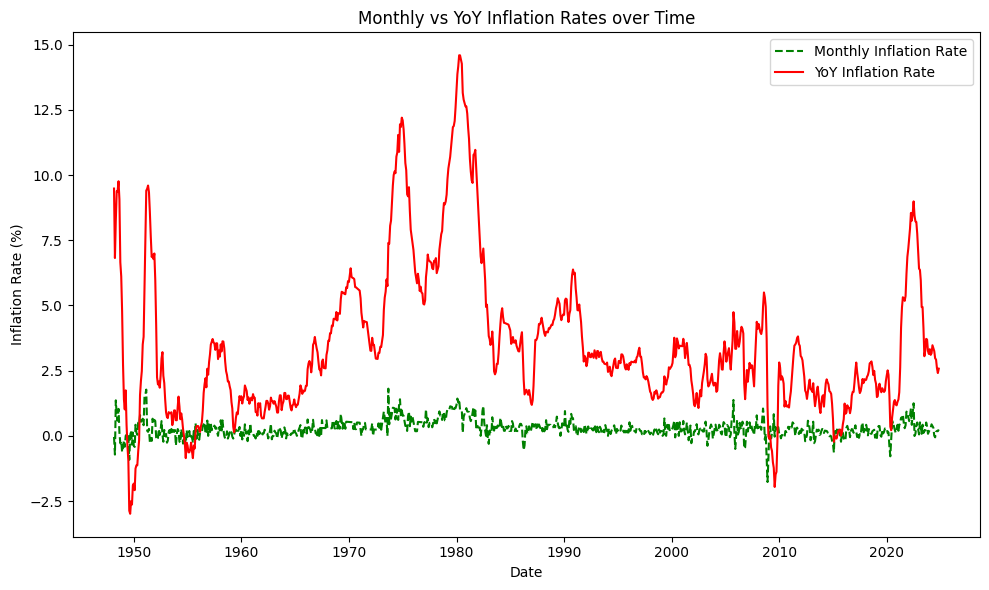

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot Monthly Inflation Rate and YoY Inflation Rate
plt.figure(figsize=(10, 6))

# Plot Monthly Inflation Rate
plt.plot(cpi_df.index, cpi_df['Monthly Inflation Rate'], color='green', label='Monthly Inflation Rate', linestyle='--')

# Plot YoY Inflation Rate
plt.plot(cpi_df.index, cpi_df['YoY Inflation Rate'], color='red', label='YoY Inflation Rate')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly vs YoY Inflation Rates over Time')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


           Annualized Volatility
S&P 500                 0.156610
Dow Jones               0.174535
NASDAQ                  0.200676


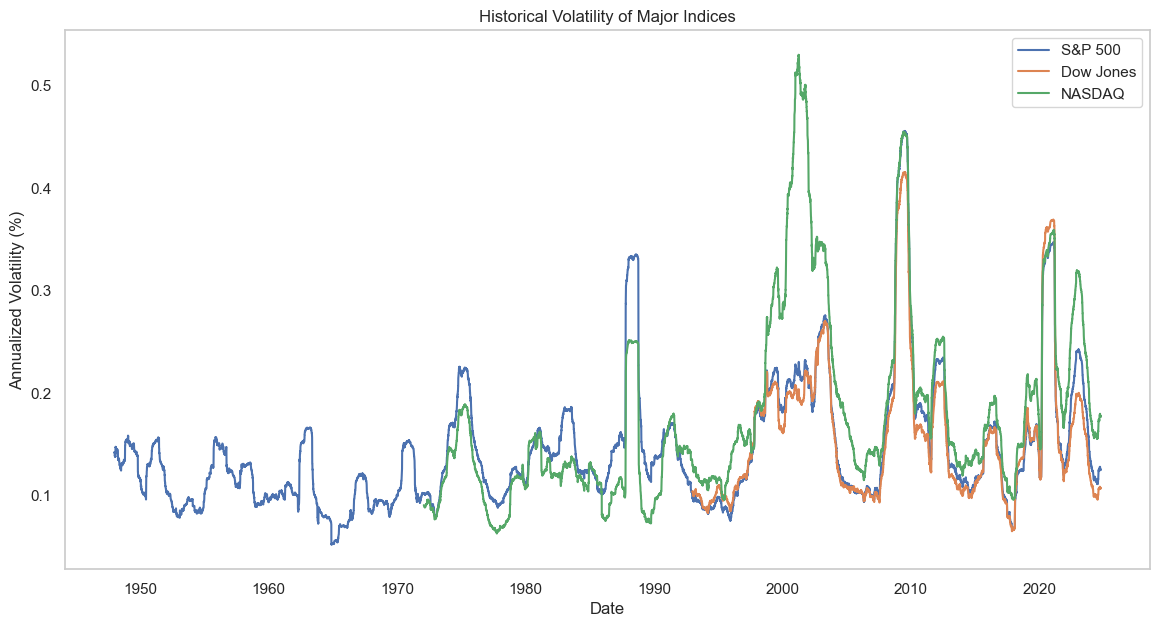

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define the indices and their corresponding ticker symbols
indices = {
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
}

# Set the start date for the data
start_date = '1947-01-01'

# Initialize a dictionary to hold the data
index_data = {}

# Download data for each index
for index_name, ticker in indices.items():
    index_data[index_name] = yf.download(ticker, start=start_date)

# Calculate daily returns and then annualized volatility for each index
volatility_data = {}

for index_name, data in index_data.items():
    # Calculate daily returns
    data['Daily Returns'] = data['Adj Close'].pct_change()
    
    # Calculate annualized volatility (standard deviation of daily returns * sqrt(252))
    annualized_volatility = data['Daily Returns'].std() * np.sqrt(252)
    
    volatility_data[index_name] = annualized_volatility

# Create a DataFrame for the results
volatility_df = pd.DataFrame(volatility_data, index=['Annualized Volatility']).T

# Print the annualized volatility for each index
print(volatility_df)

# Optional: Visualize the historical volatility over time for each index
plt.figure(figsize=(14, 7))

for index_name, data in index_data.items():
    plt.plot(data.index, data['Daily Returns'].rolling(window=252).std() * np.sqrt(252), label=index_name)

plt.title('Historical Volatility of Major Indices')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility (%)')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Download the S&P 500 data (^GSPC) from Yahoo Finance
sp500_data = yf.download('^GSPC', start='1947-01-01', end='2024-01-01', interval='1mo')

# Only keep 'Adj Close' prices
sp500_data = sp500_data['Adj Close']

# Handle missing data
sp500_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [15]:
# Calculate monthly returns for the S&P 500
sp500_returns = sp500_data.pct_change() * 100  # Monthly returns in percentage terms


In [16]:
# Define a window length (12 months for monthly data)
window_length = 12  # For monthly data, use a 12-month rolling window

# Calculate the rolling volatility (standard deviation of returns) for S&P 500
sp500_rolling_volatility = sp500_returns.rolling(window=window_length).std()

# Drop any rows with missing values (because the first 'window_length' periods will be NaN)
sp500_rolling_volatility.dropna(inplace=True)


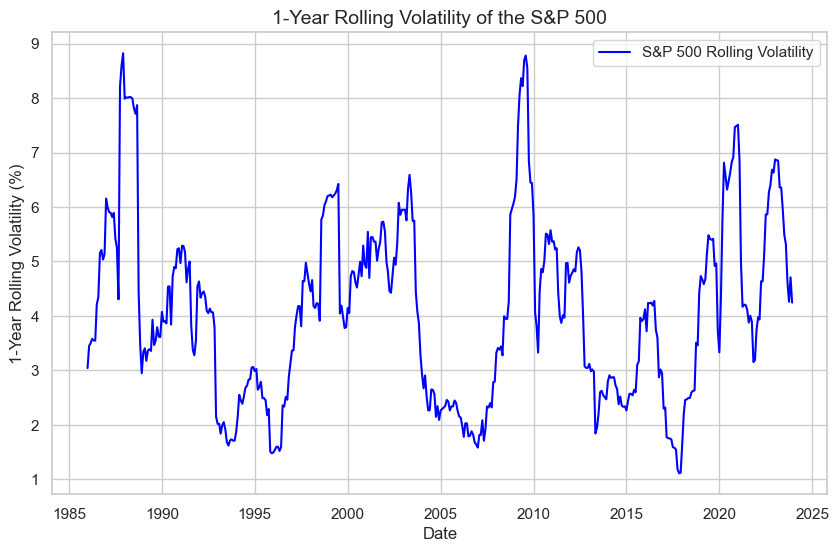

In [17]:
# Plot the rolling volatility for S&P 500
plt.figure(figsize=(10, 6))

# Plot S&P 500 rolling volatility
plt.plot(sp500_rolling_volatility.index, sp500_rolling_volatility, label='S&P 500 Rolling Volatility', color='blue')

# Add labels and title
plt.title('1-Year Rolling Volatility of the S&P 500', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1-Year Rolling Volatility (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


C:\Users\geral\AppData\Local\Temp\ipykernel_10856\2606330503.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = combined_data.pct_change().dropna()
C:\Users\geral\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\geral\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Descriptive Statistics of Returns:
            S&P 500         Gold          Oil        REITs         TIPS
count  5285.000000  5285.000000  5285.000000  5285.000000  5285.000000
mean     -0.000206     0.000400     0.000386     0.000404          NaN
std       0.052683     0.011126     0.011978     0.018233          NaN
min      -3.059661    -0.093538    -0.119841    -0.197392         -inf
25%      -0.012490    -0.004881    -0.004218    -0.005106    -0.030303
50%       0.001089     0.000457     0.000703     0.000000     0.000000
75%       0.013401     0.006289     0.005715     0.006698     0.029940
max       0.376623     0.090277     0.115800     0.187830          inf


<Figure size 1200x600 with 0 Axes>

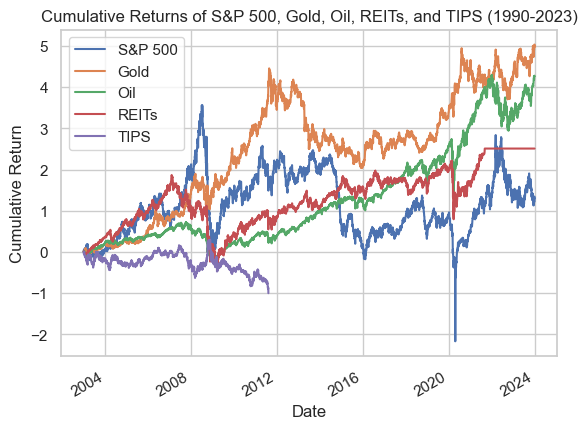

             S&P 500      Gold       Oil     REITs      TIPS
2003-01-03  0.038619  0.014736 -0.000484  0.008230  0.000000
2003-01-06 -0.029625  0.001424  0.022474  0.010515  0.012346
2003-01-07 -0.031776 -0.012511 -0.006545 -0.014741 -0.016260
2003-01-08 -0.016731  0.019004 -0.014086 -0.010006 -0.053719
2003-01-09  0.046793 -0.001695  0.019386  0.002129  0.052402


In [12]:

FRED_API_KEY = '6b4eeb7bacf916c9917c8a74feb0921c'
fred = Fred(api_key=FRED_API_KEY)

# Step 1: Define the tickers for each asset
tickers = {
    'S&P 500': '^GSPC',   # S&P 500
    'Gold': 'GC=F',       # Gold futures
    'Oil': 'CL=F',        # Crude Oil futures
    'REITs': '^RMZ'       # MSCI US REIT Index
}

# Step 2: Download data from Yahoo Finance
data = yf.download(list(tickers.values()), start="1990-01-01", end="2023-12-31", progress=False)['Adj Close']

data.columns = tickers.keys()

# Step 3: Get TIPS data from FRED (10-Year TIPS)
tips_data = fred.get_series('DFII10', observation_start='1990-01-01', observation_end='2023-12-31')
tips_df = pd.DataFrame(tips_data, columns=['TIPS'])
tips_df.index = pd.to_datetime(tips_df.index)

# Convert both DatetimeIndexes to tz-naive to avoid the error
data.index = data.index.tz_localize(None)  # Make tz-naive
tips_df.index = tips_df.index.tz_localize(None)  # Make tz-naive

# Step 4: Combine the datasets
# Merge Yahoo Finance data with TIPS data on the date index
combined_data = pd.merge(data, tips_df, left_index=True, right_index=True, how='inner')

# Step 5: Calculate returns for each asset
returns = combined_data.pct_change().dropna()

# Step 6: Display descriptive statistics
print("Descriptive Statistics of Returns:\n", returns.describe())

# Step 7: Plot the cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns of S&P 500, Gold, Oil, REITs, and TIPS (1990-2023)')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

# Step 8: Save the data to CSV for further use
combined_data.to_csv('sp500_gold_oil_reits_tips_data.csv')

# Display the first few rows of the returns
print(returns.head())

[*********************100%***********************]  5 of 5 completed
C:\Users\geral\AppData\Local\Temp\ipykernel_10856\2085287397.py:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  index_returns = index_data.pct_change().dropna()


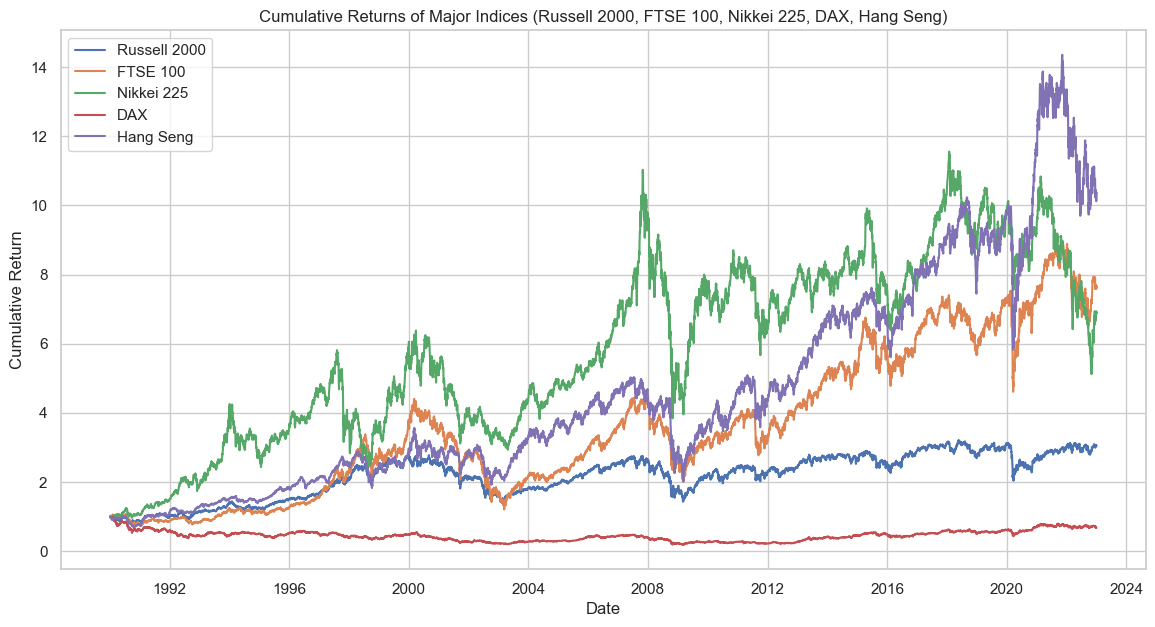

In [13]:
# Add Russell 2000 and International Indices
index_tickers = {
    'Russell 2000': '^RUT',
    'FTSE 100': '^FTSE',
    'Nikkei 225': '^N225',
    'DAX': '^GDAXI',
    'Hang Seng': '^HSI'
}


# Step 2: Download Data for Indices
index_data = yf.download(list(index_tickers.values()), start='1990-01-01', end='2023-01-01')['Adj Close']

# Rename index columns to make it easier to reference
index_data.columns = index_tickers.keys()

# Step 4: Calculate Returns (Percentage Change)
index_returns = index_data.pct_change().dropna()

# Step 5: Plot Cumulative Returns for Indices
plt.figure(figsize=(14, 7))
for index in index_returns.columns:
    plt.plot((1 + index_returns[index]).cumprod(), label=index)

plt.title('Cumulative Returns of Major Indices (Russell 2000, FTSE 100, Nikkei 225, DAX, Hang Seng)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.show()

index_data.to_csv('index_data.csv')

[*********************100%***********************]  1 of 1 completed


Correlation Coefficient: -0.013515440835882913
p-value: 0.7734754647695666


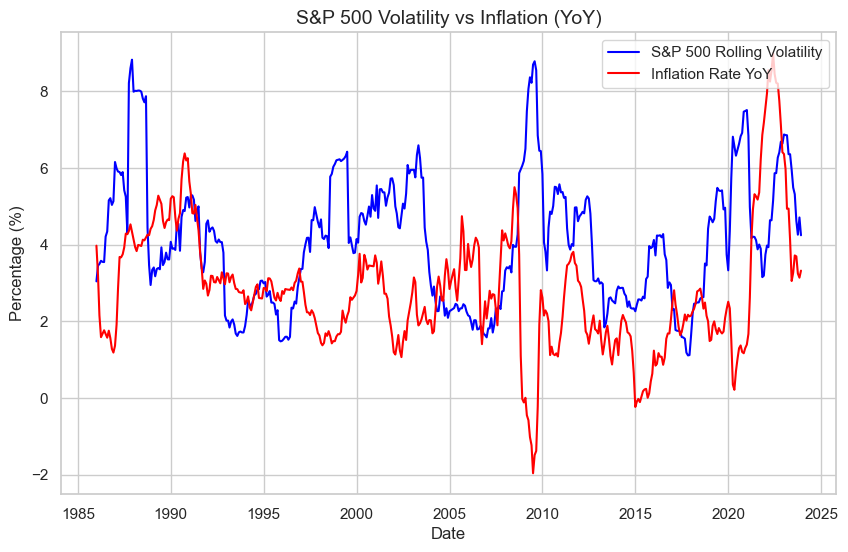

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import yfinance as yf
from fredapi import Fred

# Set up FRED API key
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# 1. Download the S&P 500 data
sp500_data = yf.download('^GSPC', start='1947-01-01', end='2024-01-01', interval='1mo')
sp500_data = sp500_data['Adj Close']
sp500_data.dropna(inplace=True)

# 2. Calculate monthly returns for S&P 500
sp500_returns = sp500_data.pct_change() * 100  # Monthly returns in percentage terms

# 3. Calculate 1-Year Rolling Volatility
window_length = 12  # 12-month window for volatility
sp500_rolling_volatility = sp500_returns.rolling(window=window_length).std()
sp500_rolling_volatility.dropna(inplace=True)

# 4. Download inflation data from FRED (use CPI for All Urban Consumers, seasonally adjusted)
inflation_data = fred.get_series('CPIAUCSL')
inflation_data = pd.DataFrame(inflation_data, columns=['CPI'])
inflation_data.index = pd.to_datetime(inflation_data.index)
inflation_data['Inflation Rate YoY'] = inflation_data['CPI'].pct_change(periods=12) * 100
inflation_data.dropna(inplace=True)

# 5. Align both datasets (intersecting time periods)
combined_data = pd.DataFrame(index=sp500_rolling_volatility.index)
combined_data['Volatility'] = sp500_rolling_volatility
combined_data['Inflation'] = inflation_data['Inflation Rate YoY']

# Drop rows where either volatility or inflation data is missing
combined_data.dropna(inplace=True)

# 6. Calculate Pearson correlation coefficient
corr, p_value = pearsonr(combined_data['Volatility'], combined_data['Inflation'])

# Output the correlation result
print(f'Correlation Coefficient: {corr}')
print(f'p-value: {p_value}')

# 7. Plot the two time series for visualization
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Volatility'], label='S&P 500 Rolling Volatility', color='blue')
plt.plot(combined_data.index, combined_data['Inflation'], label='Inflation Rate YoY', color='red')

plt.title('S&P 500 Volatility vs Inflation (YoY)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


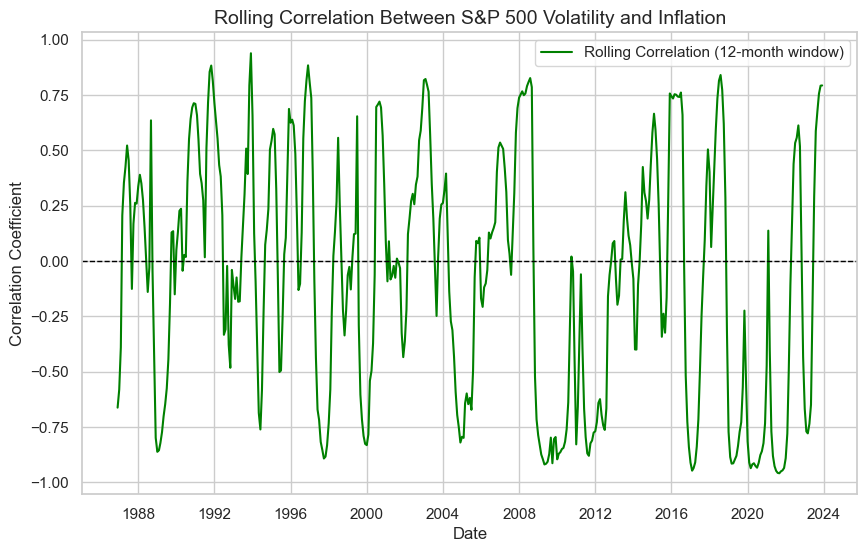

In [20]:
# 6. Calculate the rolling correlation between Volatility and Inflation
rolling_window_size = 12  # 12 months or 1 year rolling window
rolling_corr = combined_data['Volatility'].rolling(window=rolling_window_size).corr(combined_data['Inflation'])

# 7. Plot the rolling correlation over time
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation (12-month window)', color='green')

plt.title('Rolling Correlation Between S&P 500 Volatility and Inflation', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # To highlight zero correlation line
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Optional: Save the plot to a file
# plt.savefig('rolling_correlation_volatility_inflation.png')

[*********************100%***********************]  1 of 1 completed


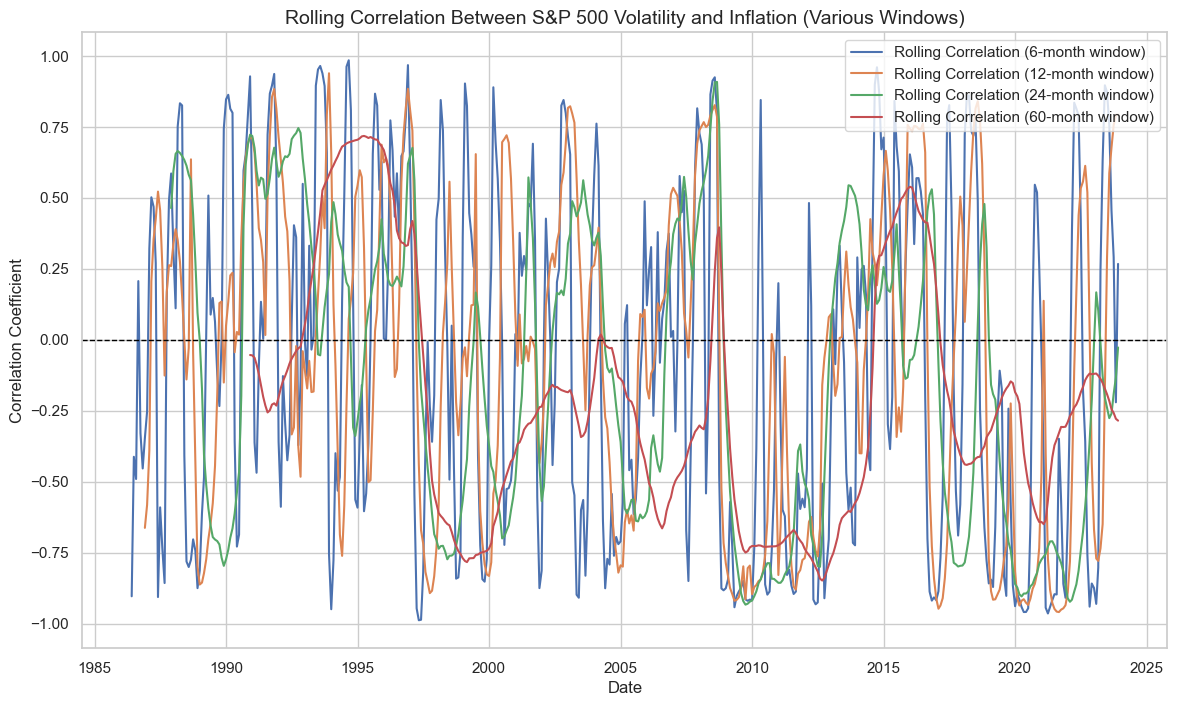

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import yfinance as yf

# Set up FRED API key
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# 1. Download the S&P 500 data
sp500_data = yf.download('^GSPC', start='1947-01-01', end='2024-01-01', interval='1mo')
sp500_data = sp500_data['Adj Close']
sp500_data.dropna(inplace=True)

# 2. Calculate monthly returns for S&P 500
sp500_returns = sp500_data.pct_change() * 100  # Monthly returns in percentage terms

# 3. Calculate 1-Year Rolling Volatility
window_length = 12  # 12-month window for volatility
sp500_rolling_volatility = sp500_returns.rolling(window=window_length).std()
sp500_rolling_volatility.dropna(inplace=True)

# 4. Download inflation data from FRED (use CPI for All Urban Consumers, seasonally adjusted)
inflation_data = fred.get_series('CPIAUCSL')
inflation_data = pd.DataFrame(inflation_data, columns=['CPI'])
inflation_data.index = pd.to_datetime(inflation_data.index)
inflation_data['Inflation Rate YoY'] = inflation_data['CPI'].pct_change(periods=12) * 100
inflation_data.dropna(inplace=True)

# 5. Align both datasets (intersecting time periods)
combined_data = pd.DataFrame(index=sp500_rolling_volatility.index)
combined_data['Volatility'] = sp500_rolling_volatility
combined_data['Inflation'] = inflation_data['Inflation Rate YoY']

# Drop rows where either volatility or inflation data is missing
combined_data.dropna(inplace=True)

# 6. Calculate rolling correlations for different windows
windows = [6, 12, 24, 60]  # 6 months, 1 year, 2 years, 3 years, 5 years
rolling_corr_dict = {}

for window in windows:
    rolling_corr_dict[window] = combined_data['Volatility'].rolling(window=window).corr(combined_data['Inflation'])

# 7. Plot the rolling correlations over time for different windows
plt.figure(figsize=(14, 8))

for window in windows:
    plt.plot(rolling_corr_dict[window], label=f'Rolling Correlation ({window}-month window)')

# Add labels and title
plt.title('Rolling Correlation Between S&P 500 Volatility and Inflation (Various Windows)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # To highlight zero correlation line
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

# Optional: Save the plot to a file
# plt.savefig('rolling_correlation_various_windows.png')


In [27]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(combined_data['Inflation'].dropna())
y = combined_data['Volatility'].dropna()

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08295
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.773
Time:                        00:23:30   Log-Likelihood:                -883.10
No. Observations:                 456   AIC:                             1770.
Df Residuals:                     454   BIC:                             1778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1285      0.157     26.372      0.0

In [2]:
import pandas as pd
from fredapi import Fred

# FRED API Key
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# Download U.S. CPI data (monthly) from FRED
cpi_data = fred.get_series('CPIAUCSL')

# Convert to DataFrame
cpi_df = pd.DataFrame(cpi_data, columns=['CPI'])
cpi_df.index = pd.to_datetime(cpi_df.index)

# Resample to monthly frequency and drop any missing values
cpi_df = cpi_df.resample('M').mean()
print(cpi_df.head())


              CPI
1947-01-31  21.48
1947-02-28  21.62
1947-03-31  22.00
1947-04-30  22.00
1947-05-31  21.95


C:\Users\geral\AppData\Local\Temp\ipykernel_4264\3379159202.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi_df = cpi_df.resample('M').mean()


In [3]:
import yfinance as yf

# Download S&P 500 price data (Adjusted Close) from Yahoo Finance
sp500 = yf.download('^GSPC', start='1947-01-01', end='2024-01-01')

# Resample the data to monthly and get the last price of each month
sp500_monthly = sp500['Adj Close'].resample('M').last()
print(sp500_monthly.head())



[*********************100%***********************]  1 of 1 completed

Date
1947-01-31    15.66
1947-02-28    15.43
1947-03-31    15.17
1947-04-30    14.58
1947-05-31    14.45
Freq: ME, Name: Adj Close, dtype: float64



C:\Users\geral\AppData\Local\Temp\ipykernel_4264\3682948484.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500['Adj Close'].resample('M').last()


In [4]:
# Calculate Year-over-Year (YoY) inflation rate from CPI data
cpi_df['YoY Inflation Rate'] = cpi_df['CPI'].pct_change(periods=12) * 100

# Drop any missing values
cpi_df.dropna(inplace=True)

print("CPI Inflation data shape:", cpi_df.shape)
print(cpi_df.head())

CPI Inflation data shape: (921, 2)
              CPI  YoY Inflation Rate
1948-01-31  23.68           10.242086
1948-02-29  23.67            9.481961
1948-03-31  23.50            6.818182
1948-04-30  23.82            8.272727
1948-05-31  24.01            9.384966


In [5]:
# Calculate monthly returns for S&P 500
sp500_monthly_returns = sp500_monthly.pct_change().dropna() * 100

print("S&P 500 Monthly Returns:", sp500_monthly_returns.head())

S&P 500 Monthly Returns: Date
1947-02-28   -1.468707
1947-03-31   -1.685031
1947-04-30   -3.889256
1947-05-31   -0.891633
1947-06-30    5.259517
Freq: ME, Name: Adj Close, dtype: float64


In [6]:
from arch import arch_model

# Fit the GARCH model using monthly returns
garch_model = arch_model(sp500_monthly_returns.dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Extract the GARCH conditional volatility
garch_volatility = garch_fit.conditional_volatility
garch_volatility_df = pd.DataFrame(garch_volatility, index=sp500_monthly_returns.index, columns=['GARCH Volatility'])

print("GARCH Volatility data shape:", garch_volatility_df.shape)
print(garch_volatility_df.head())


GARCH Volatility data shape: (923, 1)
           GARCH Volatility
Date                       
1947-02-28              NaN
1947-03-31              NaN
1947-04-30              NaN
1947-05-31              NaN
1947-06-30              NaN


In [7]:
# Merge CPI YoY Inflation and GARCH Volatility on the same index (monthly dates)
combined_df = pd.merge(cpi_df['YoY Inflation Rate'], garch_volatility_df, left_index=True, right_index=True)

# Drop rows with NaN values
combined_df.dropna(inplace=True)

print("Combined data shape:", combined_df.shape)
print(combined_df.head())


Combined data shape: (0, 2)
Empty DataFrame
Columns: [YoY Inflation Rate, GARCH Volatility]
Index: []


In [9]:
import yfinance as yf
import pandas as pd

# Step 1: Download S&P 500 data from Yahoo Finance
sp500_data = yf.download('^GSPC', start='1947-01-01', end='2024-01-01')

# Step 2: Resample to monthly frequency and take the last adjusted close price of each month
sp500_monthly = sp500_data['Adj Close'].resample('M').last()

# Step 3: Calculate monthly returns (percentage)
sp500_monthly_returns = sp500_monthly.pct_change().dropna() * 100

# Display the first few rows
print(sp500_monthly_returns.head())



[*********************100%***********************]  1 of 1 completed

Date
1947-02-28   -1.468707
1947-03-31   -1.685031
1947-04-30   -3.889256
1947-05-31   -0.891633
1947-06-30    5.259517
Freq: ME, Name: Adj Close, dtype: float64



C:\Users\geral\AppData\Local\Temp\ipykernel_4264\2943267066.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500_data['Adj Close'].resample('M').last()


In [12]:
from arch import arch_model
import numpy as np

# Step 1: Define the rolling window length (e.g., 12 months for a 1-year window)
rolling_window = 12  # Adjust this window as needed for longer or shorter periods

# Step 2: Initialize an empty list to store the rolling volatilities
rolling_volatility = []

# Step 3: Loop through the data with a step size to reduce model fitting repetitions
# We use a step size of 1 to fit the model monthly, but adjust this if needed.
step_size = 1  # Adjust this for less frequent updates if the model still takes too long

for i in range(rolling_window, len(sp500_monthly_returns), step_size):
    # Define the rolling window of returns (12 months at a time in this example)
    window_returns = sp500_monthly_returns[i - rolling_window:i]
    
    # Fit the GARCH(1,1) model on this window of returns
    garch_model = arch_model(window_returns, vol='Garch', p=1, q=1)
    try:
        garch_fit = garch_model.fit(disp='off')  # Turn off output for efficiency
        last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
    except Exception as e:
        print(f"An error occurred in window {i}: {e}")
        last_volatility = np.nan  # Fill with NaN if there's an error in fitting

    # Append the extracted volatility to the list
    rolling_volatility.append(last_volatility)

# Step 4: Convert the list of volatilities to a DataFrame and align the index with monthly returns
# The index should start after the initial rolling window period
rolling_volatility_df = pd.DataFrame(rolling_volatility, 
                                     index=sp500_monthly_returns.index[rolling_window::step_size], 
                                     columns=['Rolling GARCH Volatility'])

# Display the first few rows of the rolling volatility DataFrame
print(rolling_volatility_df.head())


C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

            Rolling GARCH Volatility
Date                                
1948-02-29                  3.035119
1948-03-31                  3.259213
1948-04-30                  4.991581
1948-05-31                  5.305140
1948-06-30                  5.020312


C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_volatility = garch_fit.conditional_volatility[-1]  # Final volatility in the window
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\1035038310.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

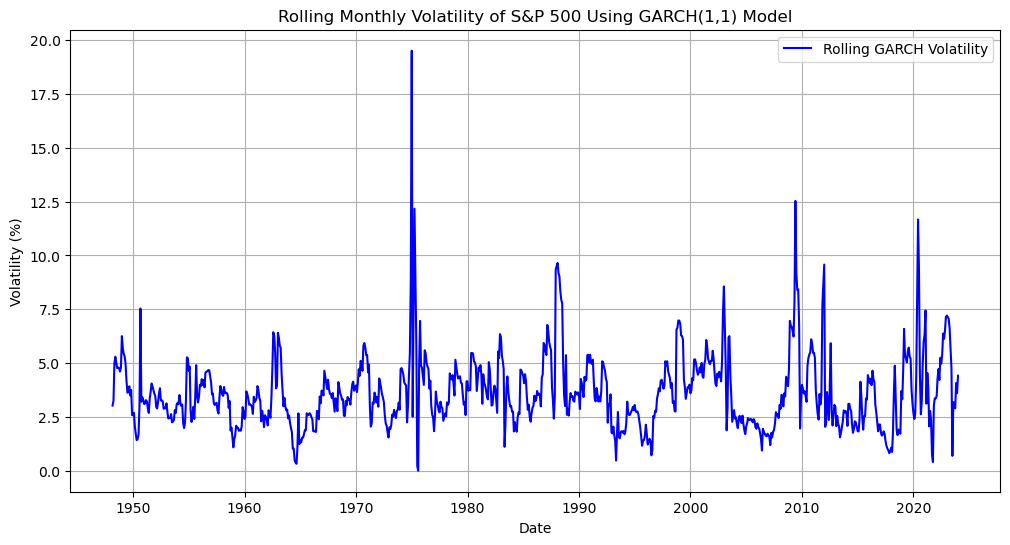

In [13]:
import matplotlib.pyplot as plt

# Plot the rolling GARCH volatility
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility_df, color='blue', label='Rolling GARCH Volatility')
plt.title('Rolling Monthly Volatility of S&P 500 Using GARCH(1,1) Model')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Display the index of the CPI DataFrame (YoY Inflation Rate)
print("Index of CPI DataFrame (YoY Inflation Rate):")
print(cpi_df.index)

# Display the index of the Rolling GARCH Volatility DataFrame
print("\nIndex of Rolling GARCH Volatility DataFrame:")
print(rolling_volatility_df.index)


Index of CPI DataFrame (YoY Inflation Rate):
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='ME')

Index of Rolling GARCH Volatility DataFrame:
DatetimeIndex(['1948-02-29', '1948-03-31', '1948-04-30', '1948-05-31',
               '1948-06-30', '1948-07-31', '1948-08-31', '1948-09-30',
               '1948-10-31', '1948-11-30',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=911, freq='ME')


In [18]:
# Ensure that the date column is set as the index
cpi_df.index = pd.to_datetime(cpi_df.index)  # Convert to DateTimeIndex if not already
cpi_df = cpi_df.sort_index()  # Sort index if necessary

# Display the first few rows to confirm the date is the index
print("CPI DataFrame with Date as Index:")
print(cpi_df.head())
print("Index Type:", type(cpi_df.index))


CPI DataFrame with Date as Index:
Empty DataFrame
Columns: [CPI, YoY Inflation Rate]
Index: []
Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [19]:
# Display the index of the CPI DataFrame (YoY Inflation Rate)
print("Index of CPI DataFrame (YoY Inflation Rate):")
print(cpi_df.index)


Index of CPI DataFrame (YoY Inflation Rate):
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq='ME')


In [20]:
print(cpi_df.head())

Empty DataFrame
Columns: [CPI, YoY Inflation Rate]
Index: []


In [21]:
from fredapi import Fred
import pandas as pd

# Initialize FRED API with your API key
api_key = '6b4eeb7bacf916c9917c8a74feb0921c'  # Replace this with your actual FRED API key
fred = Fred(api_key=api_key)

# Step 1: Download the U.S. CPI data (Consumer Price Index for All Urban Consumers - All Items, seasonally adjusted)
cpi_data = fred.get_series('CPIAUCSL')

# Step 2: Convert the CPI data to a DataFrame and set the date as the index
cpi_df = pd.DataFrame(cpi_data, columns=['CPI'])
cpi_df.index = pd.to_datetime(cpi_df.index)  # Ensure the index is in datetime format

# Step 3: Resample the data to monthly frequency and calculate the Year-over-Year (YoY) inflation rate
cpi_df = cpi_df.resample('M').last()  # Ensure we have monthly data by taking the last available data point each month

# Step 4: Calculate the Year-over-Year (YoY) inflation rate
cpi_df['YoY Inflation Rate'] = cpi_df['CPI'].pct_change(periods=12) * 100

# Step 5: Drop any rows with missing values from the YoY calculation (first 12 months will be NaN)
cpi_df.dropna(inplace=True)

# Display the first few rows to confirm the calculation
print("CPI DataFrame with YoY Inflation Rate:")
print(cpi_df.head())
print("Index Type:", type(cpi_df.index))


CPI DataFrame with YoY Inflation Rate:
              CPI  YoY Inflation Rate
1948-01-31  23.68           10.242086
1948-02-29  23.67            9.481961
1948-03-31  23.50            6.818182
1948-04-30  23.82            8.272727
1948-05-31  24.01            9.384966
Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\geral\AppData\Local\Temp\ipykernel_4264\52329144.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi_df = cpi_df.resample('M').last()  # Ensure we have monthly data by taking the last available data point each month


In [23]:
# Assuming `cpi_df` (with YoY Inflation Rate) and `monthly_volatility_df` (with GARCH Volatility) are both ready

# Check the indices of both dataframes before merging
print("CPI Data Index Range:", cpi_df.index.min(), "-", cpi_df.index.max())
print("Volatility Data Index Range:", monthly_volatility_df.index.min(), "-", monthly_volatility_df.index.max())

# Step 1: Merge the CPI data with the GARCH volatility data on the date index
combined_df = pd.merge(cpi_df[['YoY Inflation Rate']], 
                       monthly_volatility_df[['GARCH Volatility']], 
                       left_index=True, 
                       right_index=True, 
                       how='inner')  # Use 'inner' to keep only dates that are present in both dataframes

# Step 2: Drop any remaining rows with NaN values
combined_df.dropna(inplace=True)



CPI Data Index Range: 1948-01-31 00:00:00 - 2024-09-30 00:00:00
Volatility Data Index Range: 1947-02-28 00:00:00 - 2023-12-31 00:00:00


In [24]:
combined_df.head()

Empty DataFrame
Columns: [YoY Inflation Rate, GARCH Volatility]
Index: []

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from arch import arch_model


In [8]:
# Section 2: Set Up FRED API Key and Download CPI Data
from fredapi import Fred  # Make sure to install the fredapi package

# FRED API key
api_key = '6b4eeb7bacf916c9917c8a74feb0921c'  # Replace with your actual API key
fred = Fred(api_key=api_key)

# Download U.S. CPI data (monthly) from FRED and ensure it includes end-of-month values
cpi_data = fred.get_series('CPIAUCSL')

# Create DataFrame and set the index to datetime
cpi_df = pd.DataFrame(cpi_data, columns=['CPI'])
cpi_df.index = pd.to_datetime(cpi_df.index)

# Resample to get the end of month data
cpi_df = cpi_df.resample('M').last()  # Resample to end of month

# Calculate YoY Inflation Rate
cpi_df['YoY Inflation Rate'] = cpi_df['CPI'].pct_change(periods=12) * 100
cpi_df.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(cpi_df.head())


              CPI  YoY Inflation Rate
1948-01-31  23.68           10.242086
1948-02-29  23.67            9.481961
1948-03-31  23.50            6.818182
1948-04-30  23.82            8.272727
1948-05-31  24.01            9.384966


C:\Users\geral\AppData\Local\Temp\ipykernel_31104\1567649783.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi_df = cpi_df.resample('M').last()  # Resample to end of month


In [133]:
# Calculate Monthly Inflation Rate
cpi_df['Monthly Inflation Rate'] = cpi_df['CPI'].pct_change() * 100

In [134]:
# Drop NaN values created by the first difference
cpi_df.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(cpi_df.head())

              CPI  YoY Inflation Rate  Monthly Inflation Rate
1948-02-29  23.67            9.481961               -0.042230
1948-03-31  23.50            6.818182               -0.718209
1948-04-30  23.82            8.272727                1.361702
1948-05-31  24.01            9.384966                0.797649
1948-06-30  24.15            9.375000                0.583090


In [74]:
# Section 3: Download S&P 500 Data
# Download S&P 500 data from Yahoo Finance
sp500_data = yf.download('^GSPC', start='1947-01-01', end='2023-12-31')
sp500_data['Return'] = sp500_data['Adj Close'].pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


In [75]:
# Section 4: Fit GARCH Model to the Returns
model = arch_model(sp500_data['Return'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model.fit(disp="off")
sp500_data['GARCH Volatility'] = garch_fit.conditional_volatility

# Convert GARCH Volatility to percentage
sp500_data['GARCH Volatility'] = sp500_data['GARCH Volatility'] * 100  # Convert to percentage

# Create DataFrame for GARCH Volatility
monthly_volatility_df = pd.DataFrame(data=sp500_data['GARCH Volatility'], index=sp500_data.index[1:], columns=['GARCH Volatility'])
monthly_volatility_df = monthly_volatility_df.resample('M').mean()  # Resample to monthly frequency


C:\Users\geral\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.766e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\geral\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\geral\AppData\Local\Temp\ipykernel_4264\824761775.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility_df = monthly_volatility_df.resample('M').mean()  # Resample to monthly frequency


In [76]:
monthly_volatility_df.head()

GARCH Volatility
Date                        
1947-01-31          1.045856
1947-02-28          0.861308
1947-03-31          1.011334
1947-04-30          1.129978
1947-05-31          1.069761

In [77]:
# Section 5: Remove Time from the Index
cpi_df.index = cpi_df.index.date
monthly_volatility_df.index = monthly_volatility_df.index.date

# Check the indices
print("CPI Data Index Range:", cpi_df.index.min(), "-", cpi_df.index.max())
print("Volatility Data Index Range:", monthly_volatility_df.index.min(), "-", monthly_volatility_df.index.max())


CPI Data Index Range: 1948-01-31 - 2024-09-30
Volatility Data Index Range: 1947-01-31 - 2023-12-31


In [78]:
# Section 6: Merge the CPI Data with GARCH Volatility Data
combined_df = pd.merge(cpi_df[['YoY Inflation Rate']], 
                       monthly_volatility_df[['GARCH Volatility']], 
                       left_index=True, 
                       right_index=True, 
                       how='inner')  # Keep only dates that are present in both DataFrames

# Drop any remaining rows with NaN values
combined_df.dropna(inplace=True)

# Display the merged DataFrame
print("Merged DataFrame (Combined CPI YoY Inflation Rate and GARCH Volatility):")
print(combined_df.head())
print("Combined Data Shape:", combined_df.shape)


Merged DataFrame (Combined CPI YoY Inflation Rate and GARCH Volatility):
            YoY Inflation Rate  GARCH Volatility
1948-01-31           10.242086          0.744607
1948-02-29            9.481961          1.218254
1948-03-31            6.818182          0.913127
1948-04-30            8.272727          0.775738
1948-05-31            9.384966          0.804261
Combined Data Shape: (912, 2)


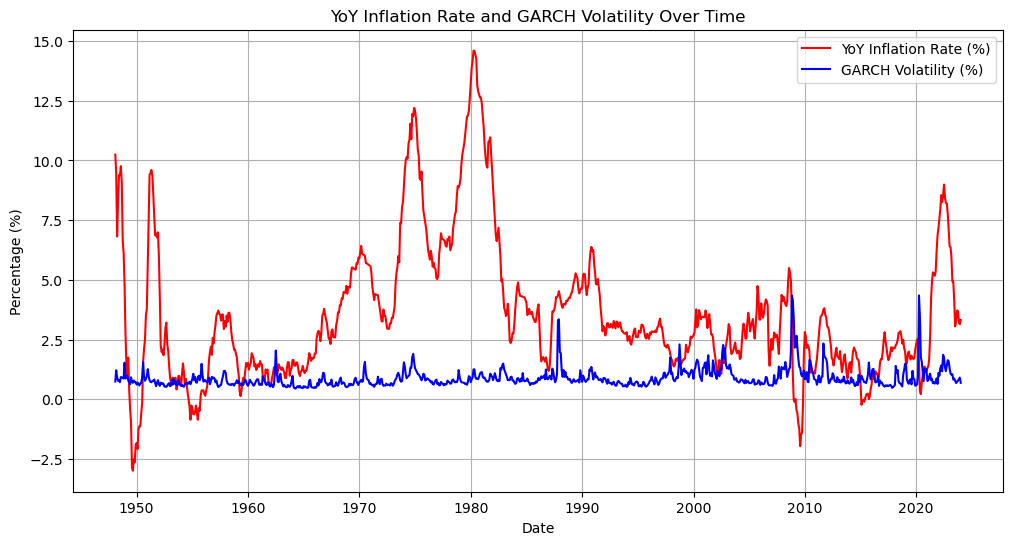

In [79]:
# Section 7: Plotting to Visualize
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['YoY Inflation Rate'], label="YoY Inflation Rate (%)", color="red")
plt.plot(combined_df.index, combined_df['GARCH Volatility'], label="GARCH Volatility (%)", color="blue")
plt.title("YoY Inflation Rate and GARCH Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.show()


In [80]:
# Section 7: Check for Correlation
correlation = combined_df.corr().iloc[0, 1]  # Get the correlation between YoY Inflation Rate and GARCH Volatility
print(f"Correlation between YoY Inflation Rate and GARCH Volatility: {correlation:.4f}")

# Optional: Display the correlation matrix
print("\nCorrelation Matrix:")
print(combined_df.corr())


Correlation between YoY Inflation Rate and GARCH Volatility: 0.0600

Correlation Matrix:
                    YoY Inflation Rate  GARCH Volatility
YoY Inflation Rate            1.000000          0.059966
GARCH Volatility              0.059966          1.000000


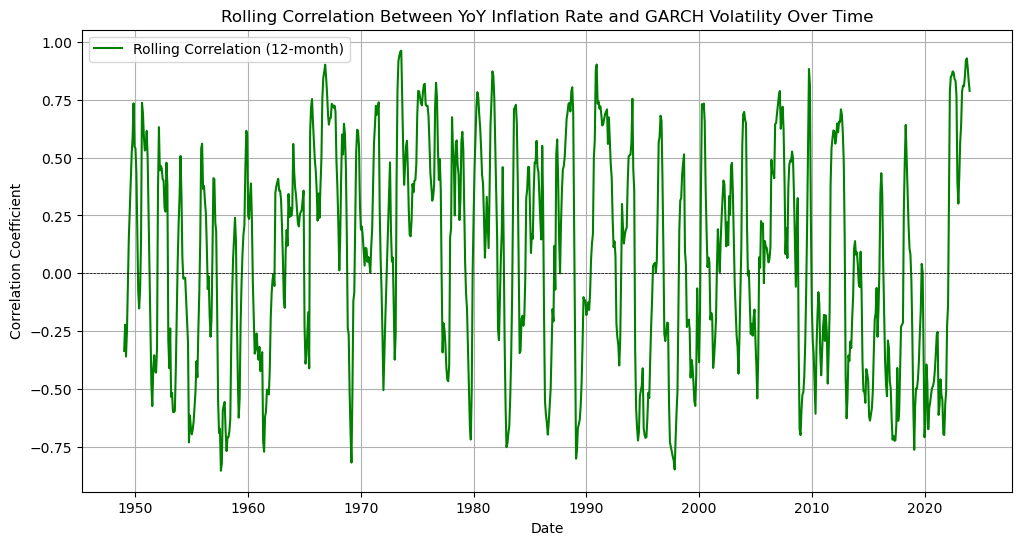

In [81]:
# Section 7: Calculate Rolling Correlation
window_size = 12  # Define the window size for rolling correlation (e.g., 12 months)
combined_df['Rolling Correlation'] = combined_df['YoY Inflation Rate'].rolling(window=window_size).corr(combined_df['GARCH Volatility'])

# Section 8: Plotting Correlation Evolution
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Rolling Correlation'], label="Rolling Correlation (12-month)", color="green")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Line at y=0 for reference
plt.title("Rolling Correlation Between YoY Inflation Rate and GARCH Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.legend()
plt.grid(True)
plt.show()


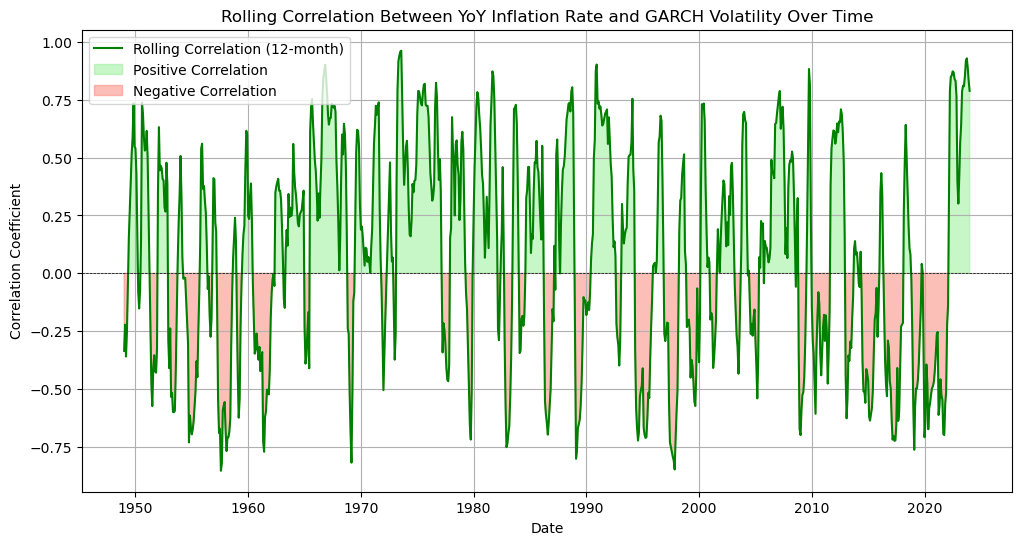

In [82]:
# Section 7: Calculate Rolling Correlation
window_size = 12  # Define the window size for rolling correlation (e.g., 12 months)
combined_df['Rolling Correlation'] = combined_df['YoY Inflation Rate'].rolling(window=window_size).corr(combined_df['GARCH Volatility'])

# Section 8: Plotting Correlation Evolution with Highlights
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Rolling Correlation'], label="Rolling Correlation (12-month)", color="green")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Line at y=0 for reference

# Highlight positive correlation
plt.fill_between(combined_df.index, combined_df['Rolling Correlation'], 0,
                 where=(combined_df['Rolling Correlation'] > 0),
                 color='lightgreen', alpha=0.5, label='Positive Correlation')

# Highlight negative correlation
plt.fill_between(combined_df.index, combined_df['Rolling Correlation'], 0,
                 where=(combined_df['Rolling Correlation'] < 0),
                 color='salmon', alpha=0.5, label='Negative Correlation')

plt.title("Rolling Correlation Between YoY Inflation Rate and GARCH Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Section 9: Count Positive and Negative Correlation Months
positive_correlation_months = (combined_df['Rolling Correlation'] > 0).sum()
negative_correlation_months = (combined_df['Rolling Correlation'] < 0).sum()

# Display the results
print(f"Number of months with positive correlation: {positive_correlation_months}")
print(f"Number of months with negative correlation: {negative_correlation_months}")


Number of months with positive correlation: 514
Number of months with negative correlation: 387


In [84]:
# Section 10: Count Months with Correlation Above 0.6
high_correlation_months = (combined_df['Rolling Correlation'] > 0.6).sum()

# Display the result
print(f"Number of months with correlation above 0.6: {high_correlation_months}")


Number of months with correlation above 0.6: 145


In [85]:
# Section 11: Count Total Number of Months
total_months = len(combined_df)

# Display the results
print(f"Total number of months: {total_months}")
print(f"Number of months with positive correlation: {positive_correlation_months}")
print(f"Number of months with negative correlation: {negative_correlation_months}")
print(f"Number of months with correlation above 0.6: {high_correlation_months}")


Total number of months: 912
Number of months with positive correlation: 514
Number of months with negative correlation: 387
Number of months with correlation above 0.6: 145


In [86]:
# Section 11: Count Total Number of Months
total_months = len(combined_df)

# Count Positive and Negative Correlation Months
positive_correlation_months = (combined_df['Rolling Correlation'] > 0).sum()
negative_correlation_months = (combined_df['Rolling Correlation'] < 0).sum()

# Count Months with Correlation Above 0.6
high_correlation_months = (combined_df['Rolling Correlation'] > 0.6).sum()

# Calculate Percentages
positive_correlation_percentage = (positive_correlation_months / total_months) * 100
negative_correlation_percentage = (negative_correlation_months / total_months) * 100
high_correlation_percentage = (high_correlation_months / total_months) * 100

# Display the results
print(f"Total number of months: {total_months}")
print(f"Number of months with positive correlation: {positive_correlation_months} ({positive_correlation_percentage:.2f}%)")
print(f"Number of months with negative correlation: {negative_correlation_months} ({negative_correlation_percentage:.2f}%)")
print(f"Number of months with correlation above 0.6: {high_correlation_months} ({high_correlation_percentage:.2f}%)")


Total number of months: 912
Number of months with positive correlation: 514 (56.36%)
Number of months with negative correlation: 387 (42.43%)
Number of months with correlation above 0.6: 145 (15.90%)


In [3]:
from fredapi import Fred
import pandas as pd

# Initialize FRED API with your API key
api_key = '6b4eeb7bacf916c9917c8a74feb0921c'
fred = Fred(api_key=api_key)

# Download 10-Year Breakeven Inflation Rate data from FRED
breakeven_inflation_data = fred.get_series('T10YIE')
breakeven_inflation_df = pd.DataFrame(breakeven_inflation_data, columns=['Expected Inflation Rate'])
breakeven_inflation_df.index = pd.to_datetime(breakeven_inflation_df.index)

# Display head of the data
breakeven_inflation_df.head()


Expected Inflation Rate
2003-01-02                     1.64
2003-01-03                     1.62
2003-01-06                     1.63
2003-01-07                     1.62
2003-01-08                     1.71

In [6]:
# Expected inflation (1-year ahead) from the Survey of Professional Forecasters (SPF)
spf_inflation_expectations = fred.get_series('CPIFABSL')  # Example series; adjust based on available data
spf_inflation_df = pd.DataFrame(spf_inflation_expectations, columns=['SPF Expected Inflation Rate'])
spf_inflation_df.index = pd.to_datetime(spf_inflation_df.index)

# Calculate YoY Inflation Rate
spf_inflation_df['YoY Expected Inflation Rate'] = spf_inflation_df['SPF Expected Inflation Rate'].pct_change(periods=12) * 100
spf_inflation_df.dropna(inplace=True)


# Display head of the data
spf_inflation_df.head()


SPF Expected Inflation Rate  YoY Expected Inflation Rate
1968-01-01                         35.5                     2.011494
1968-02-01                         35.7                     2.881844
1968-03-01                         35.8                     3.170029
1968-04-01                         36.0                     4.046243
1968-05-01                         36.1                     4.335260

In [10]:
from fredapi import Fred
import pandas as pd

# Initialize FRED API with your API key
api_key = '6b4eeb7bacf916c9917c8a74feb0921c'
fred = Fred(api_key=api_key)

# Download expected inflation data (SPF 1-year ahead) from FRED
spf_inflation_expectations = fred.get_series('CPIFABSL')
spf_inflation_df = pd.DataFrame(spf_inflation_expectations, columns=['SPF Expected Inflation Rate'])
spf_inflation_df.index = pd.to_datetime(spf_inflation_df.index)

# Resample to end of month (if not already at month-end) and calculate YoY Expected Inflation Rate
spf_inflation_df = spf_inflation_df.resample('M').ffill()  # Forward fill to ensure each month has data
spf_inflation_df['YoY Expected Inflation Rate'] = spf_inflation_df['SPF Expected Inflation Rate'].pct_change(periods=12) * 100
spf_inflation_df.dropna(inplace=True)

# Display the first few rows of expected inflation with end-of-month dates
print(spf_inflation_df.head())


            SPF Expected Inflation Rate  YoY Expected Inflation Rate
1968-01-31                         35.5                     2.011494
1968-02-29                         35.7                     2.881844
1968-03-31                         35.8                     3.170029
1968-04-30                         36.0                     4.046243
1968-05-31                         36.1                     4.335260


C:\Users\geral\AppData\Local\Temp\ipykernel_31104\757677632.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spf_inflation_df = spf_inflation_df.resample('M').ffill()  # Forward fill to ensure each month has data


In [11]:
# Merge expected and actual inflation data on month-end dates
inflation_comparison_df = pd.merge(
    spf_inflation_df[['YoY Expected Inflation Rate']], 
    cpi_df[['YoY Inflation Rate']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)

# Display the first few rows of the merged DataFrame
print(inflation_comparison_df.head())


            YoY Expected Inflation Rate  YoY Inflation Rate
1968-01-31                     2.011494            3.647416
1968-02-29                     2.881844            3.636364
1968-03-31                     3.170029            3.939394
1968-04-30                     4.046243            3.927492
1968-05-31                     4.335260            4.229607


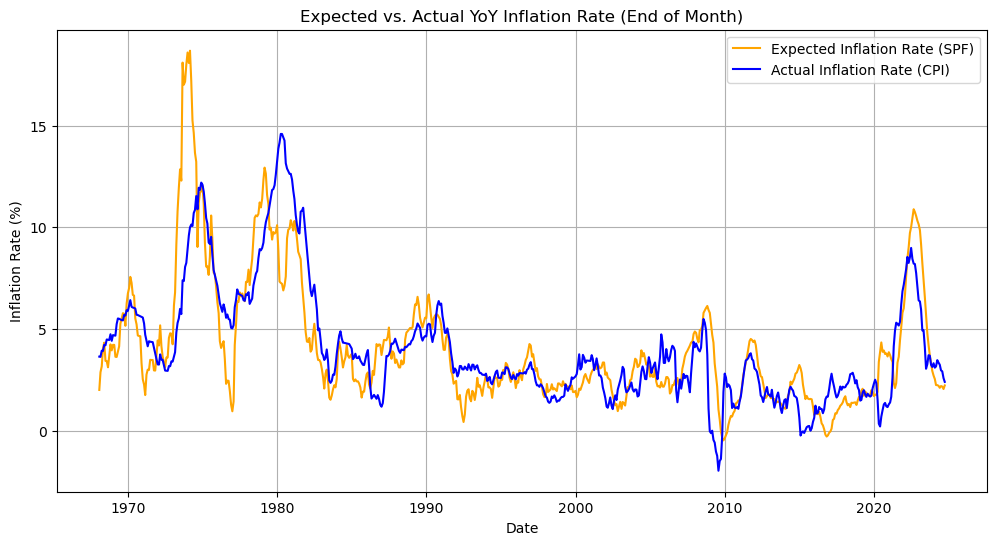

In [12]:
import matplotlib.pyplot as plt

# Plot Expected vs Actual YoY Inflation Rates
plt.figure(figsize=(12, 6))

plt.plot(inflation_comparison_df.index, inflation_comparison_df['YoY Expected Inflation Rate'], label='Expected Inflation Rate (SPF)', color='orange')
plt.plot(inflation_comparison_df.index, inflation_comparison_df['YoY Inflation Rate'], label='Actual Inflation Rate (CPI)', color='blue')

plt.title("Expected vs. Actual YoY Inflation Rate (End of Month)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Calculate forecast error
inflation_comparison_df['Forecast Error'] = inflation_comparison_df['YoY Inflation Rate'] - inflation_comparison_df['YoY Expected Inflation Rate']

# Calculate correlation, mean error, and RMSE
correlation = inflation_comparison_df['YoY Inflation Rate'].corr(inflation_comparison_df['YoY Expected Inflation Rate'])
mean_forecast_error = inflation_comparison_df['Forecast Error'].mean()
rmse = (inflation_comparison_df['Forecast Error'] ** 2).mean() ** 0.5

print(f"Correlation between Expected and Actual Inflation: {correlation:.2f}")
print(f"Mean Forecast Error: {mean_forecast_error:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}%")


Correlation between Expected and Actual Inflation: 0.78
Mean Forecast Error: -0.00%
Root Mean Squared Error (RMSE): 1.99%


In [11]:
pip install wrds


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\geral\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


ASSET CLASSES FROM HERE

In [12]:
import wrds

# Connect to WRDS
db = wrds.Connection()


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [13]:

# Adjusted query to select S&P 500 returns; omitting `spric` due to undefined column
query = """
    SELECT caldt AS date, sprtrn AS return
    FROM crsp.msp500
    WHERE caldt >= '1947-01-01' AND caldt <= '2024-01-01'
"""
sp500_df = db.raw_sql(query)

# Convert `date` to datetime format for easier handling in pandas
sp500_df['date'] = pd.to_datetime(sp500_df['date'])
sp500_df.set_index('date', inplace=True)

# Display the first few rows of data
print("S&P 500 Monthly Data from CRSP:")
print(sp500_df.head())


S&P 500 Monthly Data from CRSP:
              return
date                
1947-01-31  0.023529
1947-02-28 -0.014687
1947-03-31 -0.016850
1947-04-30 -0.038893
1947-05-29 -0.008916


In [16]:
# Rename the columns in sp500_df
sp500_df.rename(columns={'return': 'Monthly Return', 'date': 'Date'}, inplace=True)

sp500_df.head()

Monthly Return  Cumulative Return
date                                         
1947-01-31        0.023529           0.023529
1947-02-28       -0.014687           0.008496
1947-03-31       -0.016850          -0.008497
1947-04-30       -0.038893          -0.047059
1947-05-29       -0.008916          -0.055556

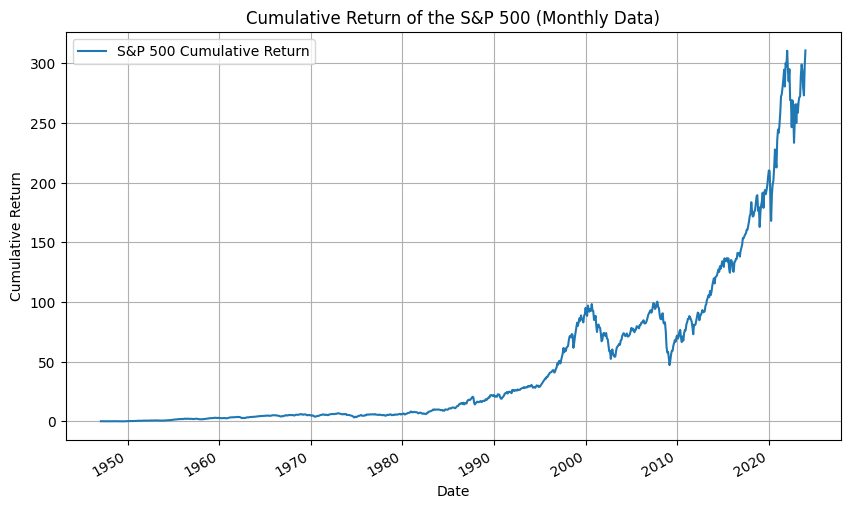

In [17]:

# Ensure data is sorted by date
sp500_df.sort_index(inplace=True)

# Calculate cumulative returns (starting from 1, subtract 1 at the end)
sp500_df['Cumulative Return'] = (1 + sp500_df['Monthly Return']).cumprod() - 1

# Plot the cumulative return
plt.figure(figsize=(10, 6))
sp500_df['Cumulative Return'].plot(label="S&P 500 Cumulative Return")
plt.title('Cumulative Return of the S&P 500 (Monthly Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
%pip install refinitiv-data



  Using cached refinitiv_data-1.6.2-py3-none-any.whl (900 kB)
  Using cached httpx-0.26.0-py3-none-any.whl (75 kB)
  Using cached pyhumps-3.8.0-py3-none-any.whl (6.1 kB)
  Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
  Using cached pyee-11.1.0-py3-none-any.whl (15 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\geral\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [19]:
%pip install eikon


  Using cached eikon-1.1.18-py3-none-any.whl (130 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached h2-4.1.0-py3-none-any.whl (57 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl (31 kB)
  Using cached DateTime-5.5-py3-none-any.whl (52 kB)
  Using cached hyperframe-6.0.1-py3-none-any.whl (12 kB)
  Using cached hpack-4.0.0-py3-none-any.whl (32 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\geral\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import eikon as ek

# Set your App Key
ek.set_app_key('61899440ebae4092ba26deecaf92f2da82521286')

# Define the ticker symbol and parameters for the Russell 2000 index
ticker = '.RUT'  # This is the symbol for the Russell 2000 index

# Retrieve monthly (end-of-month) historical data since January 1, 1984
start_date = '1984-01-01'
end_date = '2024-01-01'

# Request data
try:
    # Use the historical data function with monthly intervals
    russell2000_data = ek.get_timeseries(
        ticker,
        start_date=start_date,
        end_date=end_date,
        interval='monthly'  # Retrieves end-of-month data points
    )
    
    # Display the data
    print(russell2000_data)
except Exception as e:
    print(f"An error occurred: {e}")


.RUT             HIGH      CLOSE        LOW       OPEN  VOLUME
Date                                                          
1984-01-31       <NA>     109.43       <NA>       <NA>    <NA>
1984-02-29       <NA>      103.0       <NA>       <NA>    <NA>
1984-03-31       <NA>     103.37       <NA>       <NA>    <NA>
1984-04-30       <NA>     102.62       <NA>       <NA>    <NA>
1984-05-31       <NA>      97.07       <NA>       <NA>    <NA>
...               ...        ...        ...        ...     ...
2023-08-31  1996.8862   1899.676  1830.8366  1996.8862    <NA>
2023-09-30  1926.8094  1785.1022  1761.6081  1908.1696    <NA>
2023-10-31  1786.6406  1662.2818  1633.6677  1780.8563    <NA>
2023-11-30  1829.9961  1809.0197  1649.0585   1661.414    <NA>
2023-12-31  2071.7817   2027.074  1800.8136  1806.1341    <NA>

[480 rows x 5 columns]


In [24]:
# Calculate monthly returns as percentage change
russell2000_data['Monthly Return'] = russell2000_data['CLOSE'].pct_change()
    
# Calculate cumulative returns
russell2000_data['Cumulative Return'] = (1 + russell2000_data['Monthly Return']).cumprod() - 1
    
# Display the results
print(russell2000_data[['CLOSE', 'Monthly Return', 'Cumulative Return']])

.RUT            CLOSE  Monthly Return  Cumulative Return
Date                                                    
1984-01-31     109.43            <NA>               <NA>
1984-02-29      103.0       -0.058759          -0.058759
1984-03-31     103.37        0.003592          -0.055378
1984-04-30     102.62       -0.007255          -0.062232
1984-05-31      97.07       -0.054083          -0.112949
...               ...             ...                ...
2023-08-31   1899.676       -0.051668          16.359737
2023-09-30  1785.1022       -0.060312          15.312731
2023-10-31  1662.2818       -0.068803          14.190366
2023-11-30  1809.0197        0.088275          15.531296
2023-12-31   2027.074        0.120537          17.523933

[480 rows x 3 columns]


In [25]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
russell2000_data = russell2000_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
russell2000_data.index.name = 'Date'

# Display the updated DataFrame
print(russell2000_data)


.RUT        Monthly Return  Cumulative Return
Date                                         
1984-01-31            <NA>               <NA>
1984-02-29       -0.058759          -0.058759
1984-03-31        0.003592          -0.055378
1984-04-30       -0.007255          -0.062232
1984-05-31       -0.054083          -0.112949
...                    ...                ...
2023-08-31       -0.051668          16.359737
2023-09-30       -0.060312          15.312731
2023-10-31       -0.068803          14.190366
2023-11-30        0.088275          15.531296
2023-12-31        0.120537          17.523933

[480 rows x 2 columns]


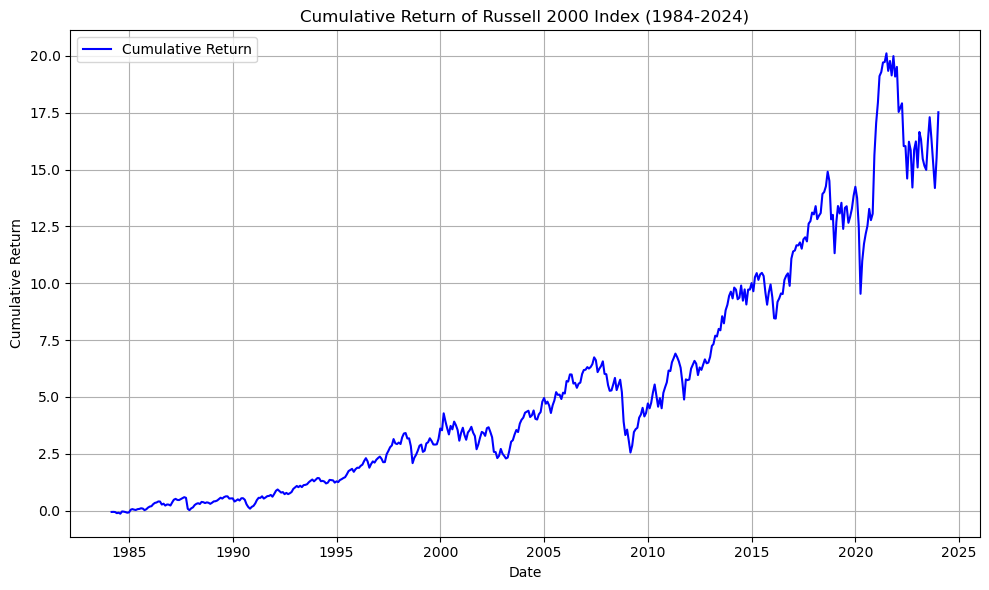

In [166]:
    # Plotting the cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(russell2000_data.index, russell2000_data['Cumulative Return'], label='Cumulative Return', color='b')
    plt.title('Cumulative Return of Russell 2000 Index (1984-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




In [26]:

# Define the ticker symbol for NASDAQ and parameters
ticker = '.IXIC'  # NASDAQ Composite index
start_date = '1947-01-01'
end_date = '2024-01-01'

# Retrieve monthly (end-of-month) historical data
try:
    nasdaq_data = ek.get_timeseries(
        ticker,
        start_date=start_date,
        end_date=end_date,
        interval='monthly'
    )
    
    # Calculate monthly returns as percentage change
    nasdaq_data['Monthly Return'] = nasdaq_data['CLOSE'].pct_change()
    
    # Calculate cumulative returns
    nasdaq_data['Cumulative Return'] = (1 + nasdaq_data['Monthly Return']).cumprod() - 1
      
    
except Exception as e:
    print(f"An error occurred: {e}")
 
print(nasdaq_data)

.IXIC            HIGH      CLOSE        LOW       OPEN         VOLUME  \
Date                                                                    
1980-03-31       <NA>      131.0       <NA>       <NA>           <NA>   
1980-04-30       <NA>    139.989       <NA>       <NA>           <NA>   
1980-05-31       <NA>    150.449       <NA>       <NA>           <NA>   
1980-06-30       <NA>    157.779       <NA>       <NA>           <NA>   
1980-07-31       <NA>    171.809       <NA>       <NA>           <NA>   
...               ...        ...        ...        ...            ...   
2023-08-31  14309.211  14034.969  13161.765  14274.934  21069026098.0   
2023-09-30  14149.622  13219.322  12963.164  14129.964  19743633516.0   
2023-10-31  13714.136  12851.238  12543.856  13217.985  19192429427.0   
2023-11-30  14423.218  14226.218  12875.199  12887.064  19772943858.0   
2023-12-31  15150.067  15011.352  14058.521  14181.354  23680019279.0   

.IXIC       Monthly Return  Cumulative Return  
Da

c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [21]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
nasdaq_data = nasdaq_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
nasdaq_data.index.name = 'Date'

# Display the updated DataFrame
print(nasdaq_data)


.IXIC       Monthly Return  Cumulative Return
Date                                         
1980-03-31            <NA>               <NA>
1980-04-30        0.068618           0.068618
1980-05-31         0.07472           0.148466
1980-06-30        0.048721            0.20442
1980-07-31        0.088922           0.311519
...                    ...                ...
2023-08-31       -0.021682         106.137168
2023-09-30       -0.058115          99.910855
2023-10-31       -0.027844          97.101053
2023-11-30        0.106992         107.597084
2023-12-31        0.055189         113.590473

[526 rows x 2 columns]


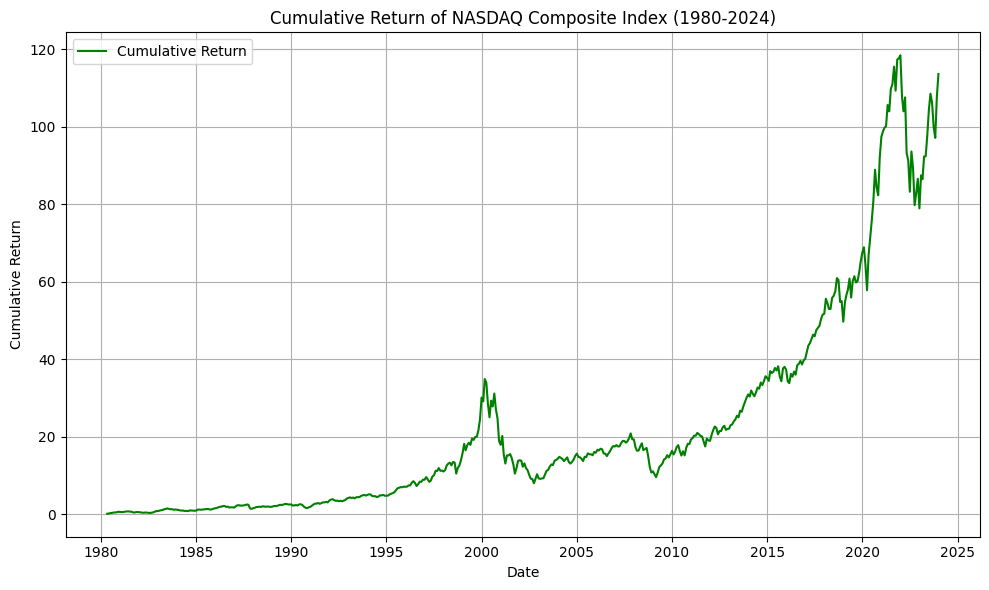

In [27]:
    # Plotting the cumulative returns for NASDAQ
    plt.figure(figsize=(10, 6))
    plt.plot(nasdaq_data.index, nasdaq_data['Cumulative Return'], label='Cumulative Return', color='g')
    plt.title('Cumulative Return of NASDAQ Composite Index (1980-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [28]:

# Define the ticker symbol for the FTSE 1000 index and parameters
ticker = '.FTSE'  # FTSE 1000 index symbol
start_date = '1984-01-01'
end_date = '2024-01-01'

# Retrieve monthly (end-of-month) historical data
try:
    FTSE_data = ek.get_timeseries(
        ticker,
        start_date=start_date,
        end_date=end_date,
        interval='monthly'
    )
    print(FTSE_data.head())  # Print the first few rows of the data

except Exception as e:
    print(f"An error occurred: {e}")


.FTSE         HIGH   CLOSE     LOW  OPEN  VOLUME
Date                                            
1984-01-31  1082.0  1063.0   993.3  <NA>    <NA>
1984-02-29  1062.6  1040.3  1010.0  <NA>    <NA>
1984-03-31  1131.3  1112.5  1042.1  <NA>    <NA>
1984-04-30  1138.3  1138.3  1090.0  <NA>    <NA>
1984-05-31  1142.8  1021.0  1008.2  <NA>    <NA>


c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [29]:
# Calculate Cumulative Returns
FTSE_data['Price'] = FTSE_data['CLOSE']  # Assuming 'CLOSE' is the column with closing prices

# Calculate percentage change (returns)
FTSE_data['Monthly Return'] = FTSE_data['Price'].pct_change()

# Calculate cumulative return (compounded)
FTSE_data['Cumulative Return'] = (1 + FTSE_data['Monthly Return']).cumprod() - 1

print(FTSE_data)

.FTSE          HIGH    CLOSE      LOW     OPEN         VOLUME    Price  \
Date                                                                     
1984-01-31   1082.0   1063.0    993.3     <NA>           <NA>   1063.0   
1984-02-29   1062.6   1040.3   1010.0     <NA>           <NA>   1040.3   
1984-03-31   1131.3   1112.5   1042.1     <NA>           <NA>   1112.5   
1984-04-30   1138.3   1138.3   1090.0     <NA>           <NA>   1138.3   
1984-05-31   1142.8   1021.0   1008.2     <NA>           <NA>   1021.0   
...             ...      ...      ...      ...            ...      ...   
2023-08-31  7715.24  7439.13  7215.76  7699.41  15224974741.0  7439.13   
2023-09-30  7746.53  7608.08  7369.64  7439.13  14471653446.0  7608.08   
2023-10-31  7687.91  7321.72  7279.86  7608.08  15119383305.0  7321.72   
2023-11-30  7533.77  7453.75  7304.89  7321.72  15168043291.0  7453.75   
2023-12-31  7762.88  7733.24  7453.75  7453.75  14838144836.0  7733.24   

.FTSE       Monthly Return  Cumulativ

In [30]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
FTSE_data = FTSE_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
FTSE_data.index.name = 'Date'

# Display the updated DataFrame
print(FTSE_data)

.FTSE       Monthly Return  Cumulative Return
Date                                         
1984-01-31            <NA>               <NA>
1984-02-29       -0.021355          -0.021355
1984-03-31        0.069403           0.046566
1984-04-30        0.023191           0.070837
1984-05-31       -0.103048          -0.039511
...                    ...                ...
2023-08-31       -0.033805           5.998241
2023-09-30        0.022711           6.157178
2023-10-31       -0.037639           5.887789
2023-11-30        0.018033           6.011994
2023-12-31        0.037497            6.27492

[480 rows x 2 columns]


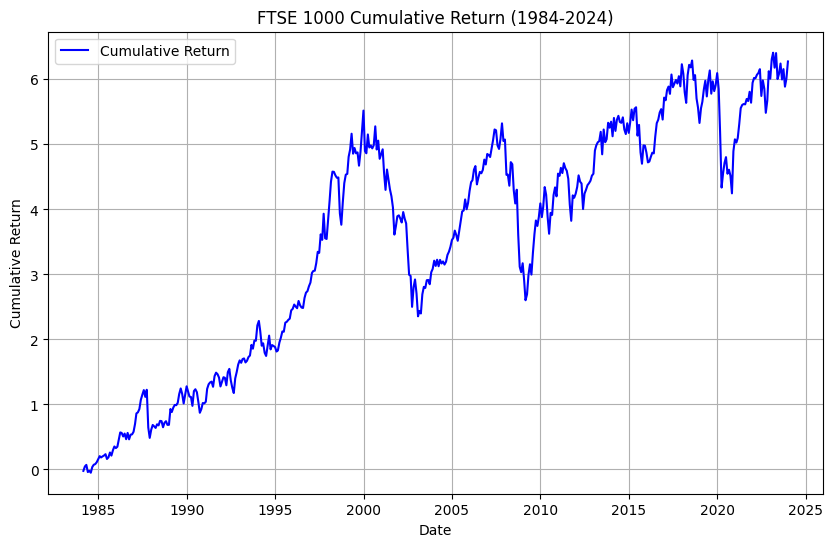

In [31]:
# Plot the cumulative return
plt.figure(figsize=(10, 6))
plt.plot(FTSE_data.index, FTSE_data['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('FTSE 1000 Cumulative Return (1984-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [32]:
import eikon as ek
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for DAX 40 index and parameters
ticker = '.GDAXI'  # DAX 40 index symbol (often used in financial data services)
start_date = '1984-01-01'
end_date = '2024-01-01'

# Retrieve monthly (end-of-month) historical data
try:
    dax_data = ek.get_timeseries(
        ticker,
        start_date=start_date,
        end_date=end_date,
        interval='monthly'
    )
    print("Data successfully retrieved")
    
    # Display first few rows of the data
    print(dax_data.head())
    
except Exception as e:
    print(f"An error occurred: {e}")



Data successfully retrieved
.GDAXI      HIGH    CLOSE   LOW  OPEN  VOLUME
Date                                         
1987-12-31  <NA>  1005.19  <NA>  <NA>    <NA>
1988-01-31  <NA>    936.0  <NA>  <NA>    <NA>
1988-02-29  <NA>  1083.34  <NA>  <NA>    <NA>
1988-03-31  <NA>  1062.33  <NA>  <NA>    <NA>
1988-04-30  <NA>  1049.17  <NA>  <NA>    <NA>


c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [33]:

# Calculate Cumulative Returns
dax_data['Price'] = dax_data['CLOSE']  # Assuming 'CLOSE' is the column with closing prices

# Calculate percentage change (returns)
dax_data['Monthly Return'] = dax_data['Price'].pct_change()

# Calculate cumulative return (compounded)
dax_data['Cumulative Return'] = (1 + dax_data['Monthly Return']).cumprod() - 1

print(dax_data)

.GDAXI          HIGH     CLOSE       LOW      OPEN        VOLUME     Price  \
Date                                                                         
1987-12-31      <NA>   1005.19      <NA>      <NA>          <NA>   1005.19   
1988-01-31      <NA>     936.0      <NA>      <NA>          <NA>     936.0   
1988-02-29      <NA>   1083.34      <NA>      <NA>          <NA>   1083.34   
1988-03-31      <NA>   1062.33      <NA>      <NA>          <NA>   1062.33   
1988-04-30      <NA>   1049.17      <NA>      <NA>          <NA>   1049.17   
...              ...       ...       ...       ...           ...       ...   
2023-08-31  16430.66  15947.08  15468.65  16414.79  1354111301.0  15947.08   
2023-09-30   15989.3  15386.58  15138.66  15936.34  1478334292.0  15386.58   
2023-10-31  15575.28  14810.34  14630.21  15439.96  1510326031.0  14810.34   
2023-11-30  16262.96  16215.43  14786.32  14851.96  1623479097.0  16215.43   
2023-12-31  17003.28  16751.64  16279.45  16296.92  1316520906.0

In [34]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
dax_data = dax_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
dax_data.index.name = 'Date'

# Display the updated DataFrame
print(dax_data)

.GDAXI      Monthly Return  Cumulative Return
Date                                         
1987-12-31            <NA>               <NA>
1988-01-31       -0.068833          -0.068833
1988-02-29        0.157415           0.077746
1988-03-31       -0.019394           0.056845
1988-04-30       -0.012388           0.043753
...                    ...                ...
2023-08-31       -0.030386          14.864742
2023-09-30       -0.035148          14.307136
2023-10-31       -0.037451          13.733871
2023-11-30        0.094872          15.131706
2023-12-31        0.033068          15.665148

[433 rows x 2 columns]


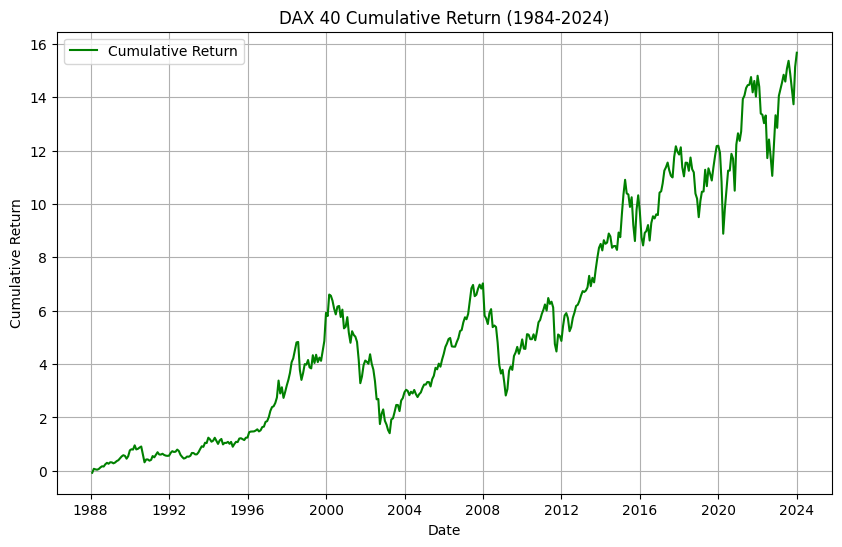

In [35]:
# Plot the cumulative return
plt.figure(figsize=(10, 6))
plt.plot(dax_data.index, dax_data['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('DAX 40 Cumulative Return (1984-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [36]:


# Define the ticker symbol for the Euro Stoxx 50 index and parameters
ticker = '.STOXX50E'  # Euro Stoxx 50 index symbol in many financial data sources
start_date = '1986-01-01'
end_date = '2024-01-01'

# Retrieve monthly (end-of-month) historical data
try:
    stoxx_data = ek.get_timeseries(
        ticker,
        start_date=start_date,
        end_date=end_date,
        interval='monthly'
    )
    print("Data successfully retrieved")
    
    # Display first few rows of the data
    print(stoxx_data.head())
    
except Exception as e:
    print(f"An error occurred: {e}")


Data successfully retrieved
.STOXX50E     HIGH   CLOSE     LOW    OPEN  VOLUME
Date                                              
1986-12-31  900.82  900.82  900.82  900.82    <NA>
1987-01-31  902.32  859.08   838.6  900.82    <NA>
1987-02-28  849.03  840.97  833.03  849.03    <NA>
1987-03-31  882.89  869.44  836.22   842.7    <NA>
1987-04-30  900.79  881.46  871.69  883.95    <NA>


c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\geral\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [37]:
# Calculate Cumulative Returns
stoxx_data['Price'] = stoxx_data['CLOSE']  # Assuming 'CLOSE' is the column with closing prices

# Calculate percentage change (returns)
stoxx_data['Monthly Return'] = stoxx_data['Price'].pct_change()

# Calculate cumulative return (compounded)
stoxx_data['Cumulative Return'] = (1 + stoxx_data['Monthly Return']).cumprod() - 1


In [38]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
stoxx_data = stoxx_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
stoxx_data.index.name = 'Date'

# Display the updated DataFrame
print(stoxx_data)

.STOXX50E   Monthly Return  Cumulative Return
Date                                         
1986-12-31            <NA>               <NA>
1987-01-31       -0.046336          -0.046336
1987-02-28       -0.021081          -0.066439
1987-03-31        0.033854          -0.034835
1987-04-30        0.013825          -0.021492
...                    ...                ...
2023-08-31       -0.038959            3.77022
2023-09-30       -0.028496           3.634289
2023-10-31       -0.027197           3.508248
2023-11-30        0.079128           3.864979
2023-12-31         0.03171           4.019249

[445 rows x 2 columns]


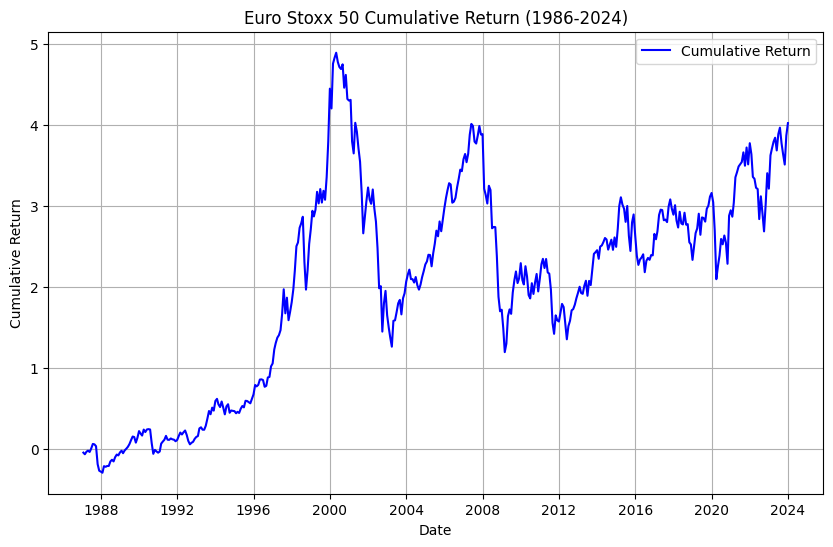

In [39]:
# Plot the cumulative return
plt.figure(figsize=(10, 6))
plt.plot(stoxx_data.index, stoxx_data['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Euro Stoxx 50 Cumulative Return (1986-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [67]:
# Download monthly historical data for Nikkei 225 from Yahoo Finance
nikkei_data = yf.download("^N225", start="1950-01-01", end="2024-01-01", interval='1mo')

# Resample the data to get the last available price at the end of each calendar month
nikkei_data = nikkei_data.resample('M').last()

# Check the data to see the first few rows
print(nikkei_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker             ^N225         ^N225         ^N225         ^N225   
Date                                                                 
1985-01-31  11992.309570  11992.309570  11992.309570  11543.000000   
1985-02-28  12321.919922  12321.919922  12321.919922  11823.429688   
1985-03-31  12580.759766  12580.759766  12604.019531  12263.849609   
1985-04-30  12426.290039  12426.290039  12683.259766  12052.820312   
1985-05-31  12758.459961  12758.459961  12790.269531  12358.030273   

Price               Open Volume  
Ticker             ^N225  ^N225  
Date                             
1985-01-31  11543.000000      0  
1985-02-28  11946.959961      0  
1985-03-31  12412.139648      0  
1985-04-30  12677.150391      0  
1985-05-31  12456.650391      0  



C:\Users\geral\AppData\Local\Temp\ipykernel_16552\2283516623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_data = nikkei_data.resample('M').last()


In [54]:
nikkei_data.columns

MultiIndex([('Adj Close', '^N225'),
            (    'Close', '^N225'),
            (     'High', '^N225'),
            (      'Low', '^N225'),
            (     'Open', '^N225'),
            (   'Volume', '^N225')],
           names=['Price', 'Ticker'])

In [68]:
# Remove the 'Ticker' level and keep only the first level of column names
nikkei_data.columns = nikkei_data.columns.get_level_values(0)

# Verify the column names
print(nikkei_data.columns)


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [69]:

# Drop any rows with missing values in 'Adj Close'
nikkei_data.dropna(subset=['Adj Close'], inplace=True)

# Calculate monthly returns
nikkei_data['Monthly Return'] = nikkei_data['Adj Close'].pct_change()

# Calculate cumulative returns
nikkei_data['Cumulative Return'] = (1 + nikkei_data['Monthly Return']).cumprod() - 1

# Drop any rows with missing values in 'Adj Close'
nikkei_data.dropna(subset=['Monthly Return'], inplace=True)

# Display the data with cumulative returns
print(nikkei_data[['Adj Close', 'Monthly Return', 'Cumulative Return']].head())


Price          Adj Close  Monthly Return  Cumulative Return
Date                                                       
1985-02-28  12321.919922        0.027485           0.027485
1985-03-31  12580.759766        0.021006           0.049069
1985-04-30  12426.290039       -0.012278           0.036188
1985-05-31  12758.459961        0.026731           0.063887
1985-06-30  12882.089844        0.009690           0.074196


In [70]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
nikkei_data = nikkei_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
nikkei_data.index.name = 'Date'

# Display the updated DataFrame
print(nikkei_data)

Price       Monthly Return  Cumulative Return
Date                                         
1985-02-28        0.027485           0.027485
1985-03-31        0.021006           0.049069
1985-04-30       -0.012278           0.036188
1985-05-31        0.026731           0.063887
1985-06-30        0.009690           0.074196
...                    ...                ...
2023-08-31       -0.016667           1.720021
2023-09-30       -0.023352           1.656504
2023-10-31       -0.031351           1.573220
2023-11-30        0.085163           1.792364
2023-12-31       -0.000678           1.790469

[467 rows x 2 columns]


In [71]:
nikkei_data.head()

Price       Monthly Return  Cumulative Return
Date                                         
1985-02-28        0.027485           0.027485
1985-03-31        0.021006           0.049069
1985-04-30       -0.012278           0.036188
1985-05-31        0.026731           0.063887
1985-06-30        0.009690           0.074196

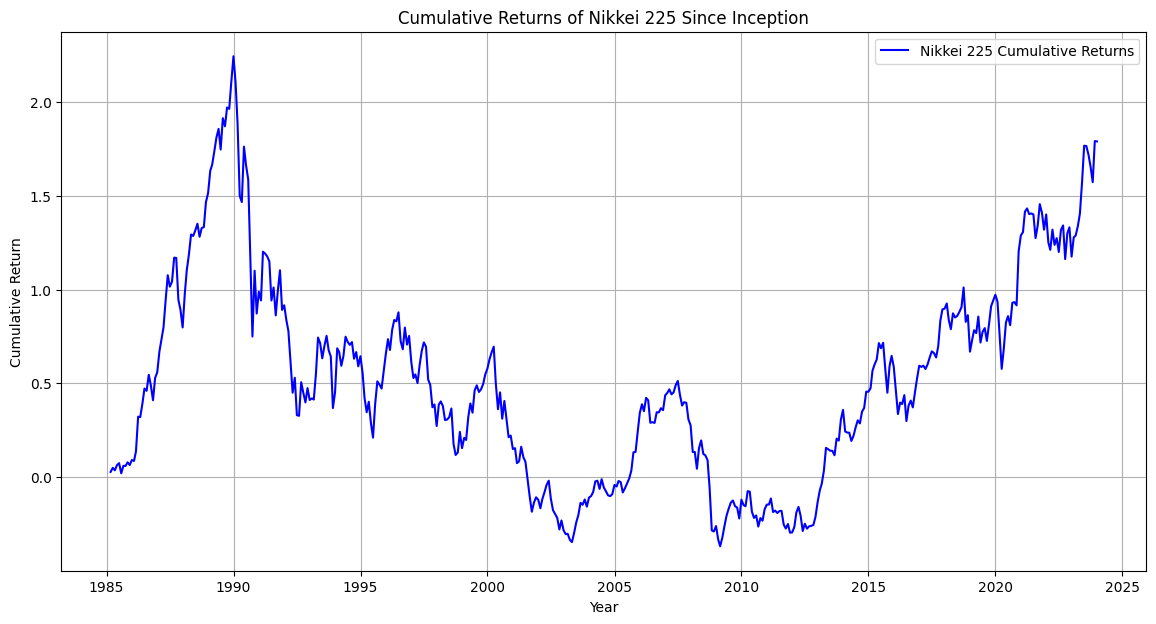

In [72]:
# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nikkei_data.index, nikkei_data['Cumulative Return'], label='Nikkei 225 Cumulative Returns', color='b')
plt.title('Cumulative Returns of Nikkei 225 Since Inception')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


### FOR REITs SEE WHAT PAPAERS USED FOR DATA

In [ ]:

rd.open_session(app_key='61899440ebae4092ba26deecaf92f2da82521286')




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            Monthly Return  Cumulative Return
Date                                         
1994-11-30             NaN                NaN
1994-12-31        0.080688           0.080688
1995-01-31        0.045932           0.130327
1995-02-28        0.079610           0.220312
1995-03-31       -0.038411           0.173439
            Monthly Return  Cumulative Return
Date                                         
1998-03-31             NaN                NaN
1998-04-30        0.142857           0.142857
1998-05-31       -0.021739           0.118012
1998-06-30        0.108333           0.239130
1998-07-31       -0.037594           0.192547


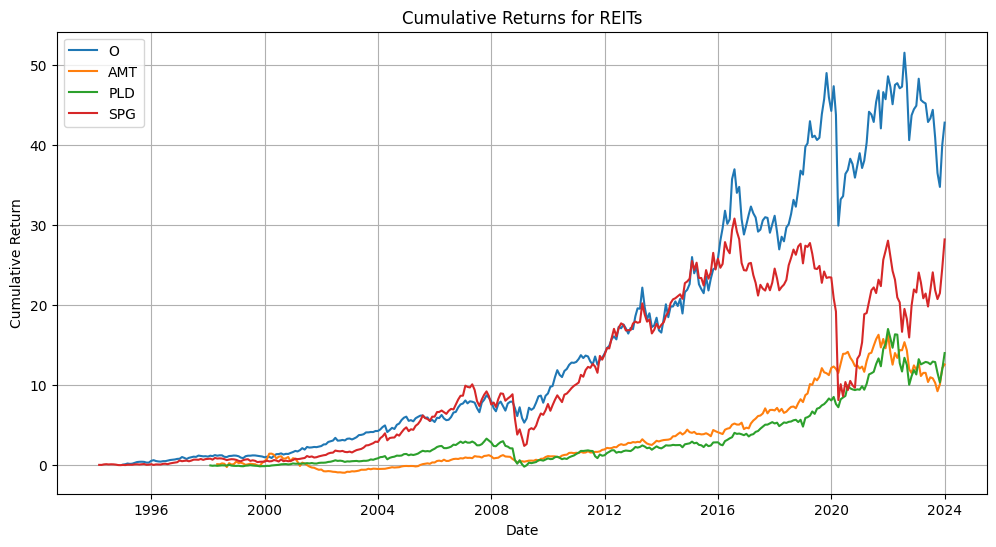

In [120]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of REIT tickers from Yahoo Finance
reits = ['O', 'AMT', 'PLD', 'SPG']

# Start and end dates for the data retrieval
start_date = '1970-01-01'
end_date = '2024-01-01'

# Loop through each REIT, get monthly data, and calculate returns
for reit in reits:
    # Download monthly data
    data = yf.download(reit, start=start_date, end=end_date, interval='1mo')
    data = data['Adj Close'].dropna()  # Use adjusted close for accurate returns calculation

    # Align index to end of the month
    data.index = data.index.to_period('M').to_timestamp('M')
    
    # Calculate monthly returns and cumulative returns
    data = pd.DataFrame(data)
    data.columns = ['price']
    data['Monthly Return'] = data['price'].pct_change()
    data['Cumulative Return'] = (1 + data['Monthly Return']).cumprod() - 1
    
    # Dynamically create a variable for each REIT DataFrame
    globals()[f"{reit}_data"] = data[['Monthly Return', 'Cumulative Return']]

# Example: Accessing one of the REIT DataFrames
print(O_data.head())
print(AMT_data.head())

# Plot cumulative returns for each REIT
plt.figure(figsize=(12, 6))

for reit in reits:
    # Access the cumulative return column from each REIT's individual DataFrame
    data = globals()[f"{reit}_data"]
    plt.plot(data.index, data['Cumulative Return'], label=reit)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns for REITs')
plt.legend()
plt.grid()
plt.show()


In [75]:
ticker = 'XAU='  # XAU= is commonly used to denote gold in USD per troy ounce

# Retrieve historical data for gold prices from 1945 to present
gold_data = ek.get_timeseries(ticker, start_date='1945-01-01', end_date='2024-01-01', interval='monthly')

# Ensure data is sorted by date
gold_data.sort_index(inplace=True)

# Calculate Monthly Returns
gold_data['Monthly Return'] = gold_data['CLOSE'].pct_change()

# Calculate Cumulative Returns
gold_data['Cumulative Return'] = (1 + gold_data['Monthly Return']).cumprod()-1

gold_data.head()

XAU=        CLOSE   HIGH    LOW   OPEN  Monthly Return  Cumulative Return
Date                                                                     
1968-03-31  39.45   41.1  39.45   40.0            <NA>               <NA>
1968-04-30  40.05  40.05  38.05   38.6        0.015209           0.015209
1968-05-31   42.8  43.25   39.9  40.15        0.068664           0.084918
1968-06-30  41.05   42.5   41.0   42.0       -0.040888           0.040558
1968-07-31   38.9  41.15   37.9  40.95       -0.052375          -0.013942

In [110]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
gold_data = gold_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
gold_data.index.name = 'Date'

# Display the updated DataFrame
print(gold_data)

XAU=        Monthly Return  Cumulative Return
Date                                         
1968-03-31            <NA>               <NA>
1968-04-30        0.015209           0.015209
1968-05-31        0.068664           0.084918
1968-06-30       -0.040888           0.040558
1968-07-31       -0.052375          -0.013942
...                    ...                ...
2023-08-31       -0.012445          48.169686
2023-09-30       -0.047135          45.852051
2023-10-31         0.07271          49.258682
2023-11-30        0.026756          50.603409
2023-12-31        0.013182           51.28365

[670 rows x 2 columns]


Text(0.5, 0, 'Year')

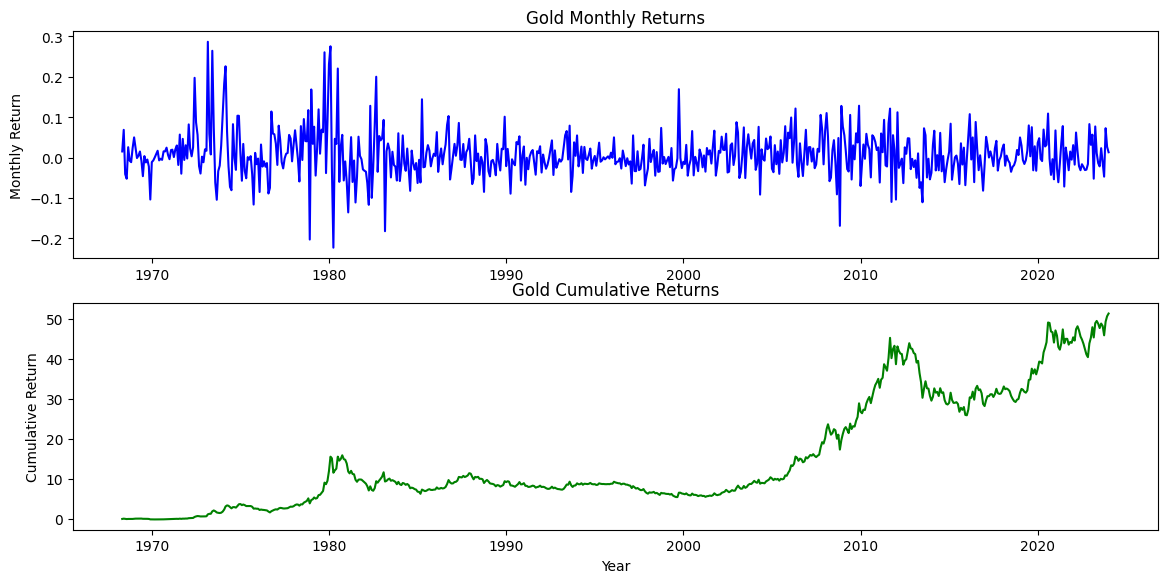

In [77]:
# Plotting the Gold Prices, Monthly Returns, and Cumulative Returns
plt.figure(figsize=(14, 10))

# Plot the monthly returns
plt.subplot(3, 1, 2)
plt.plot(gold_data.index, gold_data['Monthly Return'], color='blue')
plt.title('Gold Monthly Returns')
plt.ylabel('Monthly Return')

# Plot the cumulative returns
plt.subplot(3, 1, 3)
plt.plot(gold_data.index, gold_data['Cumulative Return'], color='green')
plt.title('Gold Cumulative Returns')
plt.ylabel('Cumulative Return')
plt.xlabel('Year')

In [78]:

# Define the instrument (Brent Crude Oil)
ticker = 'LCOc1'  # CO= is the RIC for Brent Crude Oil in USD per barrel

# Retrieve historical data for oil prices from 1945 to present
oil_data = ek.get_timeseries(ticker, start_date='1945-01-01', end_date='2024-01-01', interval='monthly')

# Ensure data is sorted by date
oil_data.sort_index(inplace=True)

# Calculate Monthly Returns
oil_data['Monthly Return'] = oil_data['CLOSE'].pct_change()

# Calculate Cumulative Returns
oil_data['Cumulative Return'] = (1 + oil_data['Monthly Return']).cumprod()-1

oil_data.head()

LCOc1        HIGH    LOW   OPEN  CLOSE  VOLUME  Monthly Return  \
Date                                                             
1988-06-30  15.66   14.8  15.64  14.85    1143            <NA>   
1988-07-31   15.9  13.79   14.6   15.7    7213        0.057239   
1988-08-31  15.64  14.48  15.64   14.6   15078       -0.070064   
1988-09-30   14.5  12.03   14.5  12.24   32942       -0.161644   
1988-10-31  13.95   11.3  11.83  12.74   31329         0.04085   

LCOc1       Cumulative Return  
Date                           
1988-06-30               <NA>  
1988-07-31           0.057239  
1988-08-31          -0.016835  
1988-09-30          -0.175758  
1988-10-31          -0.142088

In [79]:
# Filter to keep only the 'Monthly_Return' and 'Cumulative_Return' columns
oil_data = oil_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
oil_data.index.name = 'Date'

# Display the updated DataFrame
print(oil_data)

LCOc1       Monthly Return  Cumulative Return
Date                                         
1988-06-30            <NA>               <NA>
1988-07-31        0.057239           0.057239
1988-08-31       -0.070064          -0.016835
1988-09-30       -0.161644          -0.175758
1988-10-31         0.04085          -0.142088
...                    ...                ...
2023-08-31        0.015194           4.849158
2023-09-30        0.097283           5.418182
2023-10-31       -0.082887           4.886195
2023-11-30       -0.052397           4.577778
2023-12-31       -0.069902           4.187879

[427 rows x 2 columns]


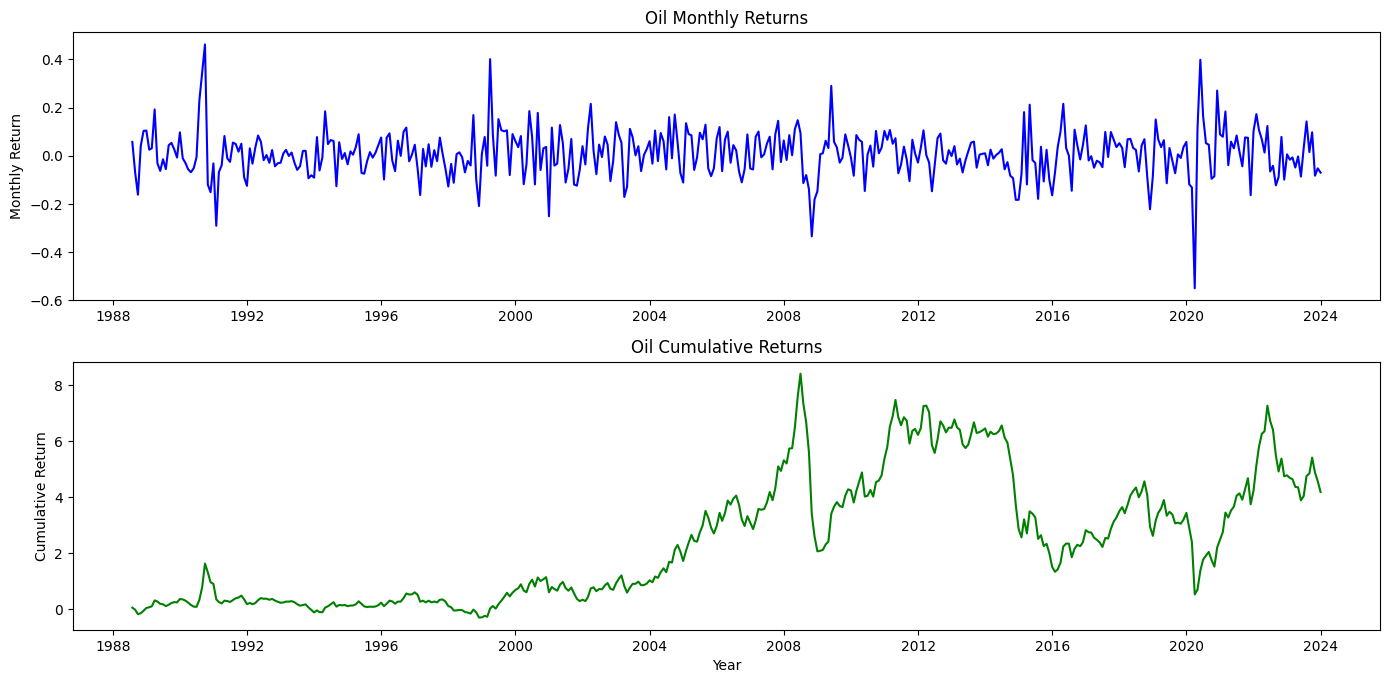

In [80]:
# Plotting the Oil Prices, Monthly Returns, and Cumulative Returns
plt.figure(figsize=(14, 10))

# Plot the monthly returns
plt.subplot(3, 1, 2)
plt.plot(oil_data.index, oil_data['Monthly Return'], color='blue')
plt.title('Oil Monthly Returns')
plt.ylabel('Monthly Return')

# Plot the cumulative returns
plt.subplot(3, 1, 3)
plt.plot(oil_data.index, oil_data['Cumulative Return'], color='green')
plt.title('Oil Cumulative Returns')
plt.ylabel('Cumulative Return')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

In [81]:
# Define the tickers for FX pairs
tickers = {
    'USD/EUR': 'EUR=',
    'USD/JPY': 'JPY=',
    'USD/CHF': 'CHF='
}

# Set the date range
start_date = '1945-01-01'
end_date = '2024-01-01'

# Loop through each FX pair, calculate returns, and plot
for name, ticker in tickers.items():
    # Get the FX data
    data = ek.get_timeseries(ticker, start_date=start_date, end_date=end_date, interval='monthly')
    data.sort_index(inplace=True)

    # Calculate Monthly Returns
    data['Monthly Returns'] = data['CLOSE'].pct_change()

    # Calculate Cumulative Returns
    data['Cumulative Return'] = (1 + data['Monthly Returns']).cumprod()-1

    # Create a separate DataFrame for each FX pair
    globals()[f"{name.replace('/', '_')}_df"] = data

 
data.head()



CHF=         CLOSE  HIGH   LOW  OPEN  COUNT  Monthly Returns  \
Date                                                           
1971-01-31  4.2963  <NA>  <NA>  <NA>   <NA>             <NA>   
1971-02-28   4.307  <NA>  <NA>  <NA>   <NA>         0.002491   
1971-03-31  4.2954  <NA>  <NA>  <NA>   <NA>        -0.002693   
1971-04-30  4.2959  <NA>  <NA>  <NA>   <NA>         0.000116   
1971-05-31  4.1058  <NA>  <NA>  <NA>   <NA>        -0.044251   

CHF=        Cumulative Return  
Date                           
1971-01-31               <NA>  
1971-02-28           0.002491  
1971-03-31          -0.000209  
1971-04-30          -0.000093  
1971-05-31           -0.04434

C:\Users\geral\AppData\Local\Temp\ipykernel_16552\2720129371.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tips_5y_data = tips_5y_data.to_frame(name='TIPS_Yield').resample('M').last()
C:\Users\geral\AppData\Local\Temp\ipykernel_16552\2720129371.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tips_5y_data['TIPS_Yield'].replace(0, pd.NA, inplace=True)
C:\Users\geral\AppData\Local\Temp\ipykernel_16552\2720129371.py:24: FutureWarning: The default fill_method='pad' 

5-Year TIPS data has been saved to tips_5y_data.csv


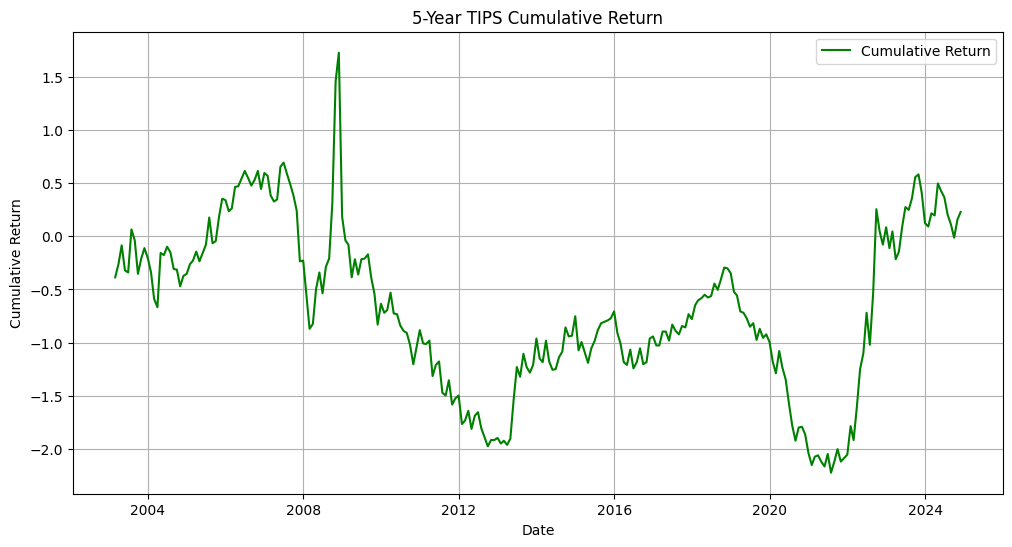

In [82]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

# Set your FRED API key
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')  # Replace with your actual FRED API key

# 5-Year TIPS Yield FRED series ID
series_id = 'DFII5'

# Define start date
start_date = '1945-01-01'

# Retrieve data from FRED
tips_5y_data = fred.get_series(series_id, start_date=start_date)

# Convert to DataFrame and resample to monthly frequency
tips_5y_data = tips_5y_data.to_frame(name='TIPS_Yield').resample('M').last()

# Ensure we don't have zero values to prevent dividing by zero in percentage change
tips_5y_data['TIPS_Yield'].replace(0, pd.NA, inplace=True)

# Calculate monthly returns (percentage change)
tips_5y_data['Monthly Return'] = tips_5y_data['TIPS_Yield'].pct_change()

# Drop any rows where the monthly return or TIPS yield is NaN (to avoid issues with cumulative return)
tips_5y_data.dropna(subset=['Monthly Return'], inplace=True)

# Calculate cumulative returns, ensuring that we start the cumulative product correctly
tips_5y_data['Cumulative Return'] = (1 + tips_5y_data['Monthly Return']).cumprod()-1

# Filter to keep only the 'Monthly Return' and 'Cumulative Return' columns
tips_5y_data = tips_5y_data[['Monthly Return', 'Cumulative Return']]

# Ensure the 'Date' column is the index (if it's not already)
tips_5y_data.index.name = 'Date'

# Save the DataFrame to a CSV file
output_file = 'tips_5y_data.csv'
tips_5y_data.to_csv(output_file)

# Confirm that the file has been saved
print(f"5-Year TIPS data has been saved to {output_file}")

# Plot the cumulative return data
plt.figure(figsize=(12, 6))
plt.plot(tips_5y_data.index, tips_5y_data['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('5-Year TIPS Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.legend()
plt.show()


C:\Users\geral\AppData\Local\Temp\ipykernel_31104\4262953312.py:18:FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


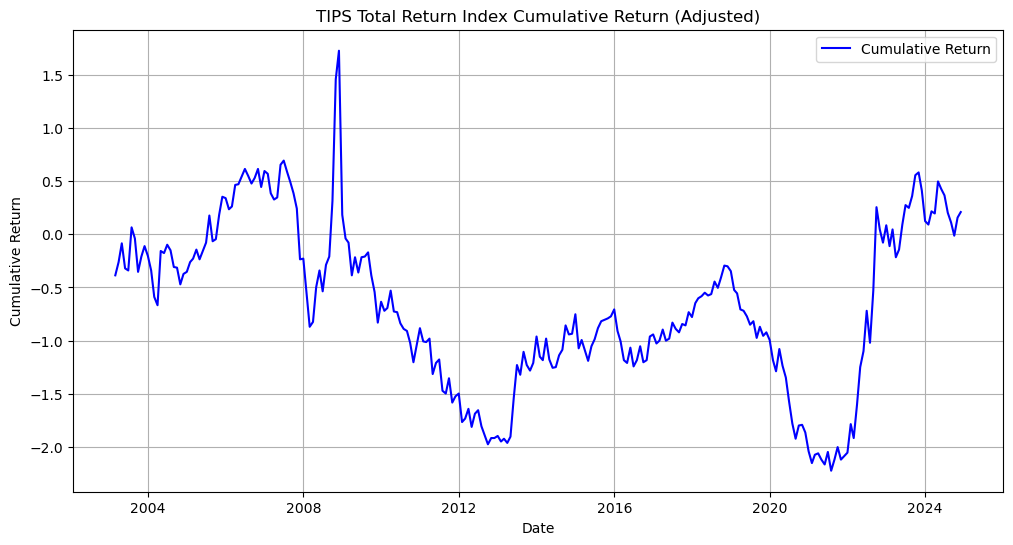

TIPS total return data has been saved to tips_total_return_data_cleaned.csv


In [357]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize the FRED API client
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# TIPS Total Return Index FRED series ID (replace with an actual series ID if available)
total_return_series_id = 'DFII5'  # Hypothetical ID; replace with the actual one.

# Define start date
start_date = '1945-01-01'

# Retrieve total return index data from FRED
tips_5y_data = fred.get_series(total_return_series_id, start_date=start_date)

# Convert to DataFrame and resample to monthly frequency
tips_5y_data = tips_5y_data.to_frame(name='Total Return Index').resample('M').last()

# Replace 0s in Total Return Index with a very small positive number
tips_5y_data['Total Return Index'] = tips_5y_data['Total Return Index'].replace(0, 1e-10)

# Calculate monthly percentage change
tips_5y_data['Monthly Return'] = tips_5y_data['Total Return Index'].pct_change()

# Drop NaN values from the percentage change calculation
tips_5y_data.dropna(inplace=True)

# Calculate cumulative returns
tips_5y_data['Cumulative Return'] = (1 + tips_5y_data['Monthly Return']).cumprod() - 1

# Rename the index to "Date"
tips_5y_data.index.name = 'Date'

# Save to CSV
output_file = 'tips_total_return_data_cleaned.csv'
tips_5y_data.to_csv(output_file)

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(tips_5y_data.index, tips_5y_data['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('TIPS Total Return Index Cumulative Return (Adjusted)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.legend()
plt.show()

# Print confirmation
print(f"TIPS total return data has been saved to {output_file}")


In [358]:
tips_5y_data.head()

Total Return Index  Monthly Return  Cumulative Return
Date                                                             
2003-02-28                0.94       -0.385621          -0.385621
2003-03-31                1.13        0.202128          -0.261438
2003-04-30                1.40        0.238938          -0.084967
2003-05-31                1.04       -0.257143          -0.320261
2003-06-30                1.01       -0.028846          -0.339869

In [83]:
import yfinance as yf
import pandas as pd

# Define the ticker for iShares TIPS ETF
ticker = "TIP"

# Download historical data
start_date = "2003-01-01"  # Start date for data
end_date = "2024-01-01"    # End date
tips_etf_data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")  # Monthly data

# Adjust the index to represent end-of-month
tips_etf_data.index = tips_etf_data.index.to_period('M').to_timestamp('M')

# Preview the adjusted data
print(tips_etf_data.head())



[*********************100%***********************]  1 of 1 completed

Price       Adj Close       Close        High         Low        Open   Volume
Ticker            TIP         TIP         TIP         TIP         TIP      TIP
Date                                                                          
2004-01-31  53.608051  102.949997  103.720001  101.080002  101.500000  3027300
2004-02-29  54.758842  105.160004  105.220001  102.809998  102.980003  2811400
2004-03-31  55.670082  106.910004  107.669998  105.019997  105.470001  3088300
2004-04-30  52.728027  101.260002  106.430000  100.800003  106.250000  2343900
2004-05-31  53.765392  102.750000  102.870003   99.529999  100.680000  2107900


In [105]:
tips_etf_data.columns = tips_etf_data.columns.get_level_values(0)

# Calculate Monthly Returns
tips_etf_data['Monthly Return'] = tips_etf_data['Adj Close'].pct_change()

# Drop NaN values after the calculation
tips_etf_data.dropna(inplace=True)

# Preview the data with returns
print(tips_etf_data[['Adj Close', 'Monthly Return']].head())


Price       Adj Close  Monthly Return
Date                                 
2004-03-31  55.670082        0.016641
2004-04-30  52.728027       -0.052848
2004-05-31  53.765392        0.019674
2004-06-30  53.619152       -0.002720
2004-07-31  54.196659        0.010771


In [106]:
# Calculate Cumulative Returns
tips_etf_data['Cumulative Return'] = (1 + tips_etf_data['Monthly Return']).cumprod() - 1

# Preview the data with cumulative returns
print(tips_etf_data[['Adj Close', 'Monthly Return', 'Cumulative Return']].head())


Price       Adj Close  Monthly Return  Cumulative Return
Date                                                    
2004-03-31  55.670082        0.016641           0.016641
2004-04-30  52.728027       -0.052848          -0.037087
2004-05-31  53.765392        0.019674          -0.018142
2004-06-30  53.619152       -0.002720          -0.020813
2004-07-31  54.196659        0.010771          -0.010267


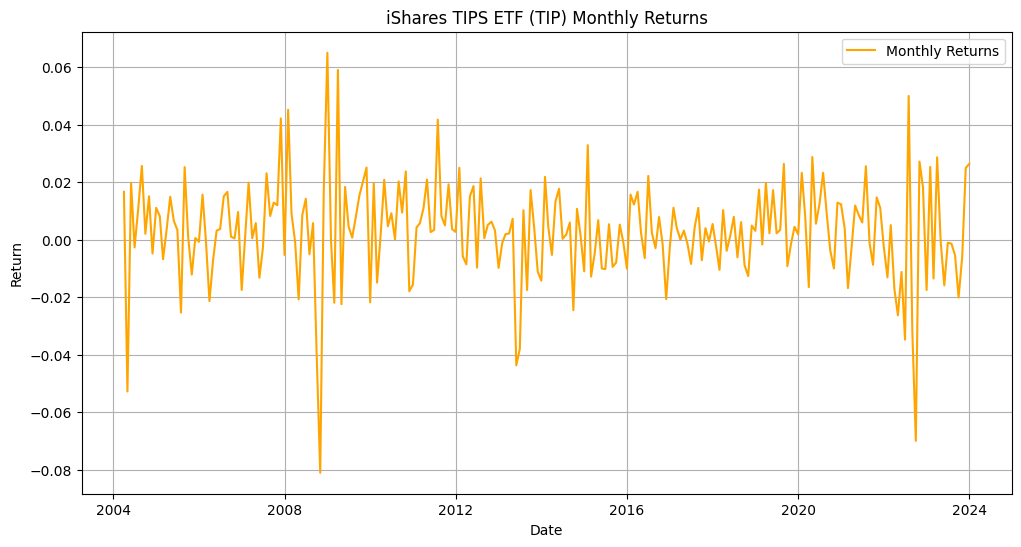

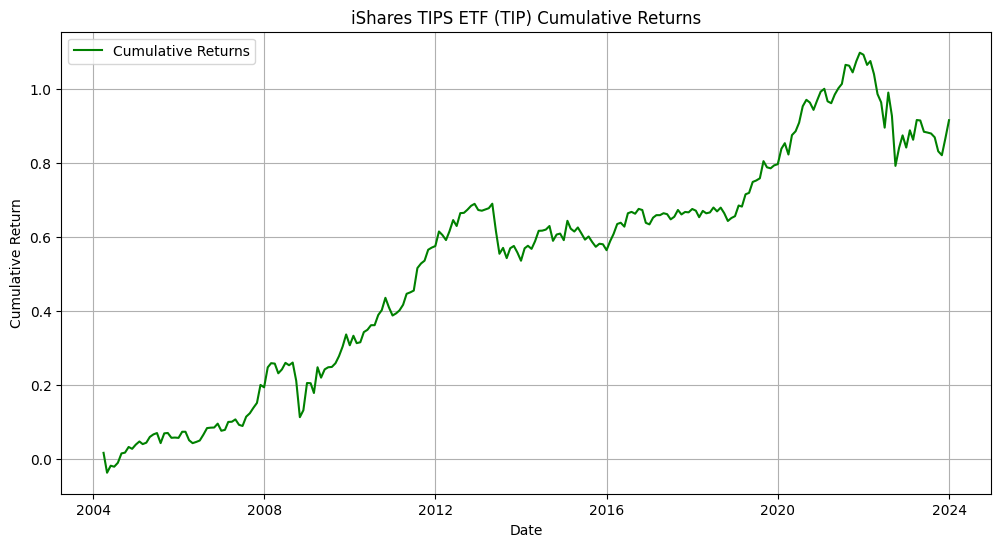

In [107]:
# Plot Monthly Returns
plt.figure(figsize=(12, 6))
plt.plot(tips_etf_data.index, tips_etf_data['Monthly Return'], label='Monthly Returns', color='orange')
plt.title('iShares TIPS ETF (TIP) Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(tips_etf_data.index, tips_etf_data['Cumulative Return'], label='Cumulative Returns', color='green')
plt.title('iShares TIPS ETF (TIP) Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()


### For TIPS try to calculate the price of the Bond and then the return

C:\Users\geral\AppData\Local\Temp\ipykernel_31104\1394573260.py:22:FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
C:\Users\geral\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59:RuntimeWarning: invalid value encountered in accumulate


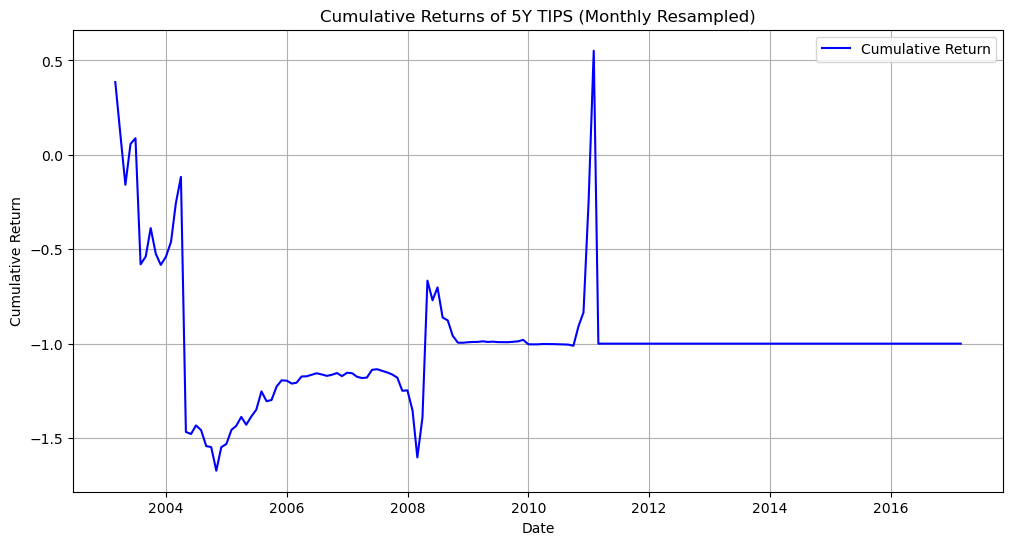

            5Y TIPS Rate (%)  Monthly Return  Cumulative Return
Date                                                           
2003-02-28              0.94        0.385621           0.385621
2003-03-31              1.13       -0.202128           0.105549
2003-04-30              1.40       -0.238938          -0.158609
2003-05-31              1.04        0.257143           0.057749
2003-06-30              1.01        0.028846           0.088261
Data saved to 5Y_TIPS_Monthly_Returns_FRED.csv


In [368]:
# Import libraries
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Initialize FRED API client (use your API key here)
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# Define the series ID for 5-Year TIPS Yield and date range
start_date = '1940-01-01'
end_date = pd.Timestamp.now()
tips_5y_series_id = 'DFII5'  # Replace with correct series ID if needed

# Step 1: Fetch the TIPS Yield data from FRED
df_tips_5y = fred.get_series(tips_5y_series_id, observation_start=start_date, observation_end=end_date)

# Step 2: Convert to a DataFrame and set the date as the index
df_tips_5y = pd.DataFrame(df_tips_5y, columns=['5Y TIPS Rate (%)'])
df_tips_5y.index.name = 'Date'

# Step 3: Resample to ensure monthly frequency (take the last available value each month)
df_tips_5y = df_tips_5y.resample('M').last()

# Step 4: Drop missing values (if any)
df_tips_5y.dropna(inplace=True)

# Step 5: Calculate Monthly Returns (percentage change in yield, inverse relationship for bond returns)
df_tips_5y['Monthly Return'] = -df_tips_5y['5Y TIPS Rate (%)'].pct_change()  # Negative to reflect bond price change

# Step 6: Drop missing values after return calculation
df_tips_5y.dropna(inplace=True)

# Step 7: Calculate Cumulative Returns
df_tips_5y['Cumulative Return'] = (1 + df_tips_5y['Monthly Return']).cumprod() - 1

# Step 8: Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_tips_5y.index, df_tips_5y['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Returns of 5Y TIPS (Monthly Resampled)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

# Display the final DataFrame
print(df_tips_5y.head())

# Step 9: Save the data to a CSV file
output_file = '5Y_TIPS_Monthly_Returns_FRED.csv'
df_tips_5y.to_csv(output_file)
print(f"Data saved to {output_file}")


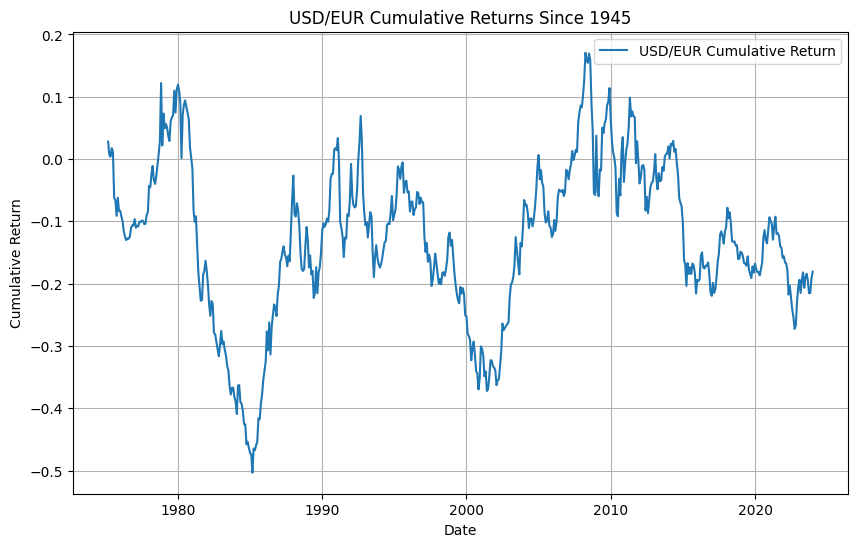

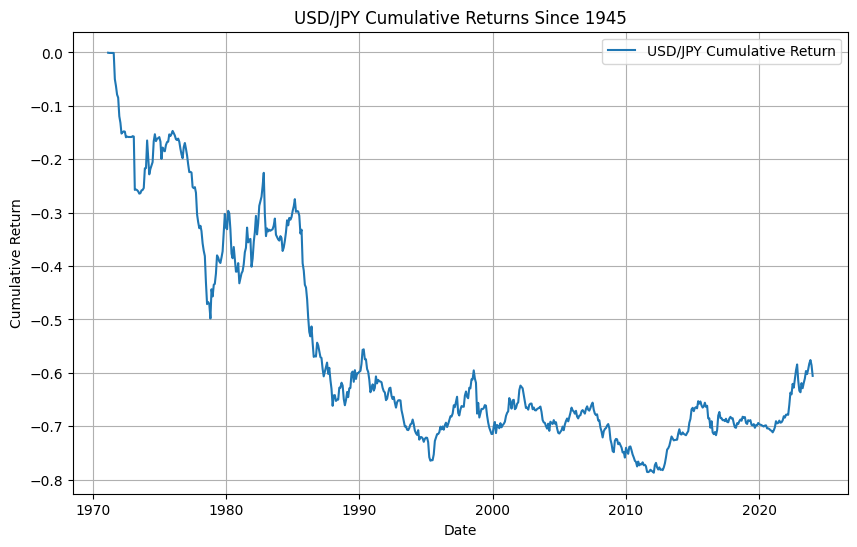

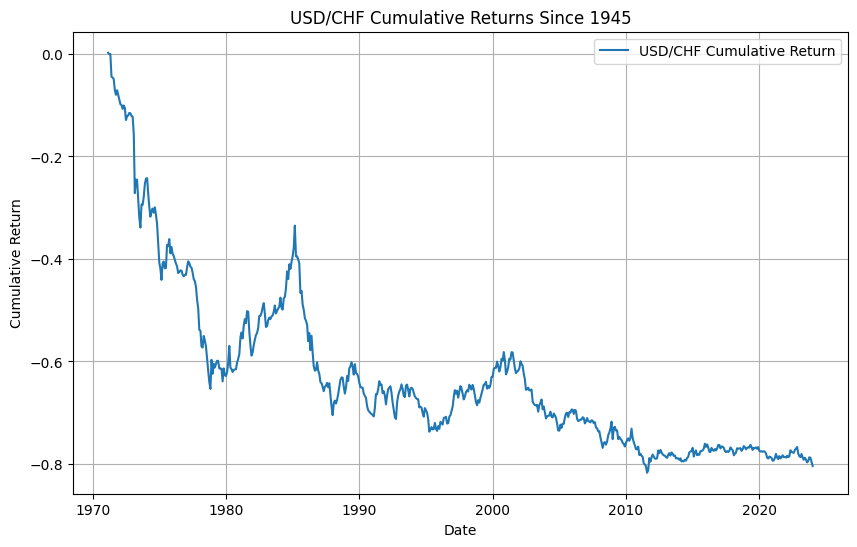

EUR=        Monthly Return  Cumulative Return
Date                                         
1975-01-31            <NA>               <NA>
1975-02-28        0.027836           0.027836
1975-03-31       -0.020654           0.006606
1975-04-30       -0.002728            0.00386
1975-05-31        0.013605           0.017518
JPY=        Monthly Return  Cumulative Return
Date                                         
1971-01-31            <NA>               <NA>
1971-02-28       -0.000447          -0.000447
1971-03-31       -0.000392          -0.000839
1971-04-30       -0.000056          -0.000895
1971-05-31             0.0          -0.000895


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import eikon as ek

# Set your Eikon API key
ek.set_app_key('61899440ebae4092ba26deecaf92f2da82521286')  # Replace with your actual key

# Define the tickers for FX pairs
tickers = {
    'USD/EUR': 'EUR=',
    'USD/JPY': 'JPY=',
    'USD/CHF': 'CHF='
}

# Set the date range
start_date = '1945-01-01'
end_date = '2024-01-01'

# Loop through each FX pair, retrieve the data, and calculate returns
for name, ticker in tickers.items():
    # Retrieve FX rate data from Refinitiv
    data = ek.get_timeseries(
        ticker, 
        start_date=start_date, 
        end_date=end_date, 
        interval='monthly'
    )
    data.sort_index(inplace=True)

    # Ensure the data is a DataFrame and calculate monthly and cumulative returns
    data = pd.DataFrame(data)
    data['Monthly Return'] = data['CLOSE'].pct_change()
    data['Cumulative Return'] = (1 + data['Monthly Return']).cumprod()-1

    # Keep only the Date index and the relevant columns
    data = data[['Monthly Return', 'Cumulative Return']]
    
    # Assign the final DataFrame to a dynamically created variable
    globals()[f"{name.replace('/', '_')}_data"] = data

    # Plot the cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Cumulative Return'], label=f'{name} Cumulative Return')
    plt.title(f'{name} Cumulative Returns Since 1945')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

# Example: Accessing one of the FX DataFrames
print(USD_EUR_data.head())
print(USD_JPY_data.head())


[*********************100%***********************]  2 of 2 completed


Ticker       BTC-USD   ETH-USD
Date                          
2017-12-01       NaN       NaN
2018-01-01 -0.277987  0.477813
2018-02-01 -0.265498  0.130120
2018-03-01 -0.507394 -0.476094
2018-04-01 -0.347253 -0.114715
...              ...       ...
2024-07-01  3.564667  3.270061
2024-08-01  3.165600  2.321375
2024-09-01  3.473560  2.439870
2024-10-01  3.959961  2.324554
2024-11-01  5.835137  3.414592

[84 rows x 2 columns]


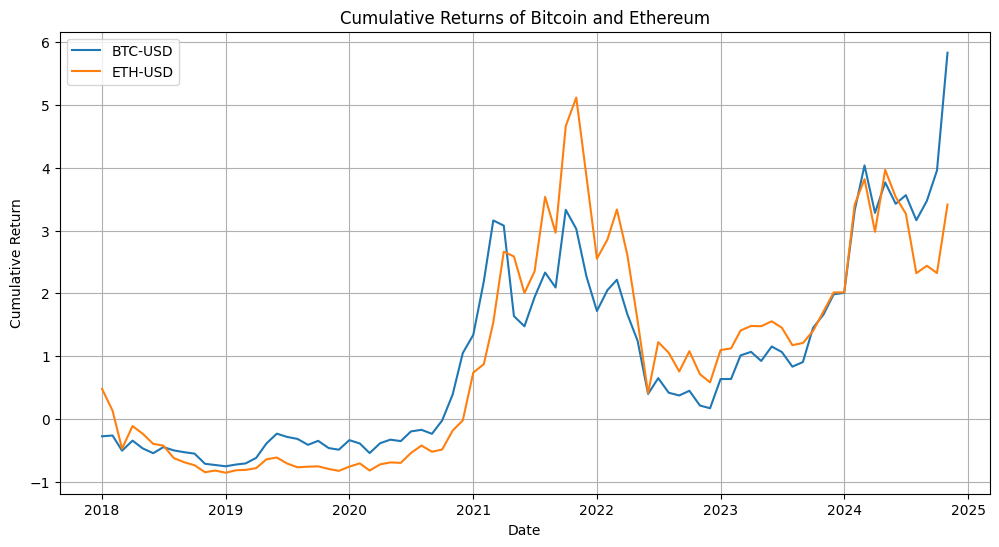

In [88]:
# Define tickers for Bitcoin and Ethereum on Yahoo Finance
tickers = ['BTC-USD', 'ETH-USD']
start_date = '2000-01-01'  # Adjust as necessary

# Retrieve data from Yahoo Finance
crypto_data = yf.download(tickers, start=start_date, interval='1mo')['Adj Close']

# Drop any rows with missing values
crypto_data.dropna(inplace=True)

# Calculate monthly returns
crypto_returns = crypto_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + crypto_returns).cumprod()-1

print(cumulative_returns)

# Plot cumulative returns for Bitcoin and Ethereum
plt.figure(figsize=(12, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)
plt.title('Cumulative Returns of Bitcoin and Ethereum')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [89]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers for Bitcoin and Ethereum on Yahoo Finance
tickers = ['BTC-USD', 'ETH-USD']
start_date = '2000-01-01'  # Adjust as necessary

# Retrieve data from Yahoo Finance
crypto_data = yf.download(tickers, start=start_date, interval='1mo')['Adj Close']

# Drop any rows with missing values
crypto_data.dropna(inplace=True)

# Ensure the index is of type datetime without time (keeping only the date)
crypto_data.index = crypto_data.index.date

# Calculate monthly returns
crypto_returns = crypto_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + crypto_returns).cumprod()-1

# Create a DataFrame with one column for monthly returns and one for cumulative returns
crypto_df = pd.DataFrame({
    'BTC Monthly Return': crypto_returns['BTC-USD'],
    'ETH Monthly Return': crypto_returns['ETH-USD'],
    'BTC Cumulative Return': cumulative_returns['BTC-USD'],
    'ETH Cumulative Return': cumulative_returns['ETH-USD']
})

# Drop any rows with missing values
crypto_df.dropna(inplace=True)

# Display the final DataFrame
print(crypto_df)

# Plot cumulative returns for Bitcoin and Ethereum
plt.figure(figsize=(12, 6))
plt.plot(monthly_cumulative_returns.index, monthly_cumulative_returns['BTC Cumulative Return'], label='BTC Cumulative Return')
plt.plot(monthly_cumulative_returns.index, monthly_cumulative_returns['ETH Cumulative Return'], label='ETH Cumulative Return')
plt.title('Cumulative Returns of Bitcoin and Ethereum')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  2 of 2 completed


            BTC Monthly Return  ETH Monthly Return  BTC Cumulative Return  \
2018-01-01           -0.277987            0.477813              -0.277987   
2018-02-01            0.017298           -0.235276              -0.265498   
2018-03-01           -0.329333           -0.536415              -0.507394   
2018-04-01            0.325089            0.689777              -0.347253   
2018-05-01           -0.188991           -0.137745              -0.470616   
...                        ...                 ...                    ...   
2024-07-01            0.030967           -0.058724               3.564667   
2024-08-01           -0.087425           -0.222172               3.165600   
2024-09-01            0.073929            0.035676               3.473560   
2024-10-01            0.108728           -0.033523               3.959961   
2024-11-01            0.378063            0.327875               5.835137   

            ETH Cumulative Return  
2018-01-01               0.477813  
201

NameError: name 'monthly_cumulative_returns' is not defined

<Figure size 1200x600 with 0 Axes>

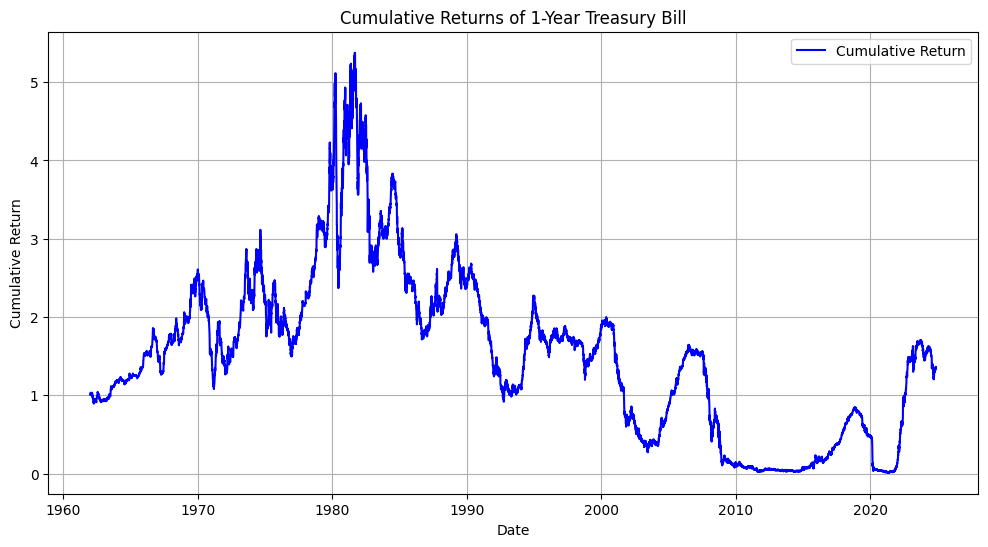

            1Y T-Bill Rate (%)  Monthly Return  Cumulative Return
Date                                                             
1962-01-02                3.22             NaN                NaN
1962-01-03                3.24        0.006211           1.006211
1962-01-04                3.24        0.000000           1.006211
1962-01-05                3.26        0.006173           1.012422
1962-01-08                3.31        0.015337           1.027950
...                        ...             ...                ...
2024-11-15                4.34       -0.004587           1.347826
2024-11-18                4.33       -0.002304           1.344720
2024-11-19                4.34        0.002309           1.347826
2024-11-20                4.37        0.006912           1.357143
2024-11-21                4.39        0.004577           1.363354

[15709 rows x 3 columns]


In [90]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your own FRED API key (sign up at https://fred.stlouisfed.org/)
fred = Fred(api_key='6b4eeb7bacf916c9917c8a74feb0921c')

# Retrieve 1-Year Treasury Constant Maturity Rate (DGS1)
start_date = '1940-01-01'
end_date = pd.Timestamp.now()

# Fetch data from FRED
t_bill_data = fred.get_series('DGS1', observation_start=start_date, observation_end=end_date)

# Convert to DataFrame
y1_t_bill_df = pd.DataFrame(t_bill_data, columns=['1Y T-Bill Rate (%)'])
y1_t_bill_df.index.name = 'Date'

# Drop missing values
y1_t_bill_df.dropna(inplace=True)

# Calculate Monthly Returns
y1_t_bill_df['Monthly Return'] = y1_t_bill_df['1Y T-Bill Rate (%)'].pct_change()

# Calculate Cumulative Returns
y1_t_bill_df['Cumulative Return'] = (1 + y1_t_bill_df['Monthly Return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(y1_t_bill_df.index, y1_t_bill_df['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Returns of 1-Year Treasury Bill')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

# Display the final DataFrame
print(y1_t_bill_df)

# Save the data to a CSV file
y1_t_bill_df.to_csv('1Y_Treasury_Bill_Returns_FRED.csv')


##Create table like the one for FAMA AND SCHEWERT TABLE 3, RETURNS PER DECADE

## Check each Data Frame name for the Date and Monthly return

In [91]:
print(FTSE_data)

.FTSE       Monthly Return  Cumulative Return
Date                                         
1984-01-31            <NA>               <NA>
1984-02-29       -0.021355          -0.021355
1984-03-31        0.069403           0.046566
1984-04-30        0.023191           0.070837
1984-05-31       -0.103048          -0.039511
...                    ...                ...
2023-08-31       -0.033805           5.998241
2023-09-30        0.022711           6.157178
2023-10-31       -0.037639           5.887789
2023-11-30        0.018033           6.011994
2023-12-31        0.037497            6.27492

[480 rows x 2 columns]


In [ ]:
# List of your data frames for merging
data_frames = [
    sp500_df, russell2000_data, nasdaq_data, FTSE_data, dax_data, stoxx_data, nikkei_data,
    reit_data, gold_data, oil_data, fx_data, tips_5y_data, crypto_df
]

['O', 'AMT', 'PLD', 'SPG']




## Missing below Crypto

In [92]:
# Check the types of the elements in data_frames
for i, df in enumerate(data_frames):
    print(f"Index {i}: Type = {type(df)}")

NameError: name 'data_frames' is not defined

In [121]:
import pandas as pd

# List of dataframes (ensure they are already loaded into memory)
data_frames = [
    sp500_df, russell2000_data, nasdaq_data, FTSE_data, dax_data, stoxx_data, nikkei_data,
    gold_data, oil_data, tips_etf_data, y1_t_bill_df, O_data, AMT_data, PLD_data, SPG_data, USD_EUR_data, 
    USD_JPY_data, USD_CHF_data
]

# List of corresponding names for the datasets
dataset_names = [
    "S&P 500", "Russell 2000", "NASDAQ", "FTSE", "DAX", "STOXX", "Nikkei", 
    "Gold", "Oil", "TIPS ETF", "1 Year Treasury Bill", "REIT O", "REIT AMT", "REIT PLD", "REIT SPG",
    "USD/EUR", "USD/JPY", "USD/CHF"
]

# Initialize an empty dictionary to store the average annualized returns per 5-year interval for each dataset
average_annualized_returns_per_interval = {}

# Iterate through each dataframe and corresponding name
for df, name in zip(data_frames, dataset_names):
    # Ensure the index is in datetime format (if it's not already)
    df.index = pd.to_datetime(df.index)

    # Check if 'Monthly Return' column exists in the DataFrame
    if 'Monthly Return' in df.columns:
        # Create 5-year intervals starting from 1940
        start_year = 1940
        df['5-Year Interval'] = ((df.index.year - start_year) // 5) * 5 + start_year

        # Group by 5-year intervals and calculate the average monthly return per interval
        avg_monthly_return = df.groupby('5-Year Interval')['Monthly Return'].mean()

        # Annualize the average monthly return using the formula
        annualized_return = (1 + avg_monthly_return) ** 12 - 1

        # Convert to percentage
        annualized_return_percentage = annualized_return * 100

        # Store the result in the dictionary
        average_annualized_returns_per_interval[name] = annualized_return_percentage
    else:
        print(f"Warning: 'Monthly Return' column not found in {name} DataFrame.")

# Combine the results into a single DataFrame for display
annualized_interval_summary = pd.DataFrame(average_annualized_returns_per_interval)

# Transpose the DataFrame so that intervals are rows and datasets are columns
annualized_interval_summary_transposed = annualized_interval_summary.transpose()

# Format the values to show percentages with 2 decimal places
annualized_interval_summary_transposed = annualized_interval_summary_transposed.round(2)

# Display the resulting transposed table
print(annualized_interval_summary_transposed)



5-Year Interval           1945       1950      1955      1960      1965  \
S&P 500               4.091651  17.294333  11.50371  8.001871  2.381894   
Russell 2000              <NA>       <NA>      <NA>      <NA>      <NA>   
NASDAQ                    <NA>       <NA>      <NA>      <NA>      <NA>   
FTSE                      <NA>       <NA>      <NA>      <NA>      <NA>   
DAX                       <NA>       <NA>      <NA>      <NA>      <NA>   
STOXX                     <NA>       <NA>      <NA>      <NA>      <NA>   
Nikkei                     NaN        NaN       NaN       NaN       NaN   
Gold                      <NA>       <NA>      <NA>      <NA> -5.169828   
Oil                       <NA>       <NA>      <NA>      <NA>      <NA>   
TIPS ETF                   NaN        NaN       NaN       NaN       NaN   
1 Year Treasury Bill       NaN        NaN       NaN   0.36242  0.738998   
REIT O                     NaN        NaN       NaN       NaN       NaN   
REIT AMT                 

#### CHECK WHY THE MONTHLY RETURNS ON SOME OF THESE ARE GIVING ERRORS, NAMELY TIPS Still Does not make sense

#LIQUIDITY IS KEY, INVESTORS LOOKING FOR LIQUIDITY

In [94]:
cpi_df.head()

CPI  Monthly Inflation Rate  YoY Inflation Rate
1948-02-29  23.67               -0.042230            9.481961
1948-03-31  23.50               -0.718209            6.818182
1948-04-30  23.82                1.361702            8.272727
1948-05-31  24.01                0.797649            9.384966
1948-06-30  24.15                0.583090            9.375000

In [95]:
# Rename the index to "Date"
cpi_df.index.name = "Date"

# Display the first few rows to confirm the change
print(cpi_df.head())


              CPI  Monthly Inflation Rate  YoY Inflation Rate
Date                                                         
1948-02-29  23.67               -0.042230            9.481961
1948-03-31  23.50               -0.718209            6.818182
1948-04-30  23.82                1.361702            8.272727
1948-05-31  24.01                0.797649            9.384966
1948-06-30  24.15                0.583090            9.375000


In [96]:
import statsmodels.api as sm
import pandas as pd

# Ensure the Date index is in datetime format for both DataFrames
sp500_df.index = pd.to_datetime(sp500_df.index)
cpi_df.index = pd.to_datetime(cpi_df.index)

# Merge `sp500_df` with `cpi_df` on their indices (Date)
merged_sp500 = pd.merge(
    sp500_df[['Monthly Return']],  # Only take the Monthly Return column from sp500_df
    cpi_df[['Monthly Inflation Rate']],  # Only take the Monthly Inflation Rate column from cpi_df
    left_index=True,
    right_index=True,
    how='inner'
)

# Drop any rows with missing values
merged_sp500 = merged_sp500.dropna()

# Check if the merged DataFrame is empty
if merged_sp500.empty:
    print("The merged DataFrame is empty after dropping NaNs.")
else:
    # Define X (independent variable) and y (dependent variable)
    X = merged_sp500['Monthly Inflation Rate']  # Independent variable
    y = merged_sp500['Monthly Return']  # Dependent variable

    # Add a constant to the independent variable for regression
    X = sm.add_constant(X)

    # Perform Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, X).fit()

    # Display regression summary
    print("Regression results for S&P 500 vs Monthly Inflation Rate:")
    print(model.summary())


Regression results for S&P 500 vs Monthly Inflation Rate:
                            OLS Regression Results                            
Dep. Variable:         Monthly Return   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.213
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00429
Time:                        21:28:49   Log-Likelihood:                 1121.0
No. Observations:                 640   AIC:                            -2238.
Df Residuals:                     638   BIC:                            -2229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [82]:
# Ensure the Date index is in datetime format for both DataFrames
russell2000_data.index = pd.to_datetime(russell2000_data.index)
cpi_df.index = pd.to_datetime(cpi_df.index)

# Merge `russell2000_data` with `cpi_df` on their indices (Date)
merged_russell2000 = pd.merge(
    russell2000_data[['Monthly Return']],  # Only take the Monthly Return column
    cpi_df[['Monthly Inflation Rate']],  # Only take the Monthly Inflation Rate column
    left_index=True,
    right_index=True,
    how='inner'
)

# Drop any rows with missing values
merged_russell2000 = merged_russell2000.dropna()

# Check if the merged DataFrame is empty
if merged_russell2000.empty:
    print("The merged DataFrame for Russell 2000 is empty after dropping NaNs.")
else:
    # Define X (independent variable) and y (dependent variable)
    X = merged_russell2000['Monthly Inflation Rate']  # Independent variable
    y = merged_russell2000['Monthly Return']  # Dependent variable

    # Add a constant to the independent variable for regression
    X = sm.add_constant(X)

    # Perform Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, X).fit()

    # Display regression summary
    print("Regression results for Russell 2000 vs Monthly Inflation Rate:")
    print(model.summary())


Regression results for Russell 2000 vs Monthly Inflation Rate:
                            OLS Regression Results                            
Dep. Variable:         Monthly Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1299
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.719
Time:                        22:07:32   Log-Likelihood:                 694.96
No. Observations:                 479   AIC:                            -1386.
Df Residuals:                     477   BIC:                            -1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [84]:
tips_etf_data.head()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2004-02-01  102.980003  105.220001  102.809998  105.160004  54.758820   
2004-03-01  105.470001  107.669998  105.019997  106.910004  55.670059   
2004-04-01  106.250000  106.430000  100.800003  101.260002  52.728001   
2004-05-01  100.680000  102.870003   99.529999  102.750000  53.765400   
2004-06-01  101.750000  102.269997  100.099998  101.919998  53.619106   

             Volume  Monthly Return  Cumulative Return  5-Year Interval  
Date                                                                     
2004-02-01  2811400        0.021466           0.021466             2000  
2004-03-01  3088300        0.016641           0.038465             2000  
2004-04-01  2343900       -0.052848          -0.016416             2000  
2004-05-01  2107900        0.019675           0.002935             2000  
2004-06-01  1950500       -0.002721           0.000206             2000

In [90]:
# Ensure the Date index is in datetime format for both DataFrames
tips_etf_data.index = pd.to_datetime(tips_etf_data.index)
cpi_df.index = pd.to_datetime(cpi_df.index)

# Merge `tips_etf_data` with `cpi_df` on their indices (Date)
merged_tips_etf = pd.merge(
    tips_etf_data[['Monthly Return']],  # Only take the Monthly Return column
    cpi_df[['Monthly Inflation Rate']],  # Only take the Monthly Inflation Rate column
    left_index=True,
    right_index=True,
    how='inner'
)

# Drop any rows with missing values
merged_tips_etf = merged_tips_etf.dropna()

# Check if the merged DataFrame is empty
if merged_tips_etf.empty:
    print("The merged DataFrame for TIPS ETF is empty after dropping NaNs.")
else:
    # Define X (independent variable) and y (dependent variable)
    X = merged_tips_etf['Monthly Inflation Rate']  # Independent variable
    y = merged_tips_etf['Monthly Return']  # Dependent variable

    # Add a constant to the independent variable for regression
    X = sm.add_constant(X)

    # Perform Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, X).fit()

    # Display regression summary
    print("Regression results for TIPS ETF vs Monthly Inflation Rate:")
    print(model.summary())


Regression results for TIPS ETF vs Monthly Inflation Rate:
                            OLS Regression Results                            
Dep. Variable:         Monthly Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4172
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.519
Time:                        22:17:42   Log-Likelihood:                 628.15
No. Observations:                 239   AIC:                            -1252.
Df Residuals:                     237   BIC:                            -1245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [92]:
gold_data.head()

XAU=        Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1968-03-31            <NA>               <NA>             1965
1968-04-30        0.015209           0.015209             1965
1968-05-31        0.068664           0.084918             1965
1968-06-30       -0.040888           0.040558             1965
1968-07-31       -0.052375          -0.013942             1965

In [93]:
gold_data = gold_data.dropna()

# Optional: Preview the cleaned dataframe
print(gold_data.head())

XAU=        Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1968-04-30        0.015209           0.015209             1965
1968-05-31        0.068664           0.084918             1965
1968-06-30       -0.040888           0.040558             1965
1968-07-31       -0.052375          -0.013942             1965
1968-08-31        0.025707           0.011407             1965


In [97]:
nikkei_data = nikkei_data.dropna()

# Optional: Preview the cleaned dataframe
print(nikkei_data.head())

            Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1985-02-01        0.027485           0.027485             1985
1985-03-01        0.021006           0.049069             1985
1985-04-01       -0.012278           0.036188             1985
1985-05-01        0.026731           0.063887             1985
1985-06-01        0.009690           0.074196             1985


In [98]:
import pandas as pd
import statsmodels.api as sm

# Ensure the Date column in both dataframes is a datetime type
gold_data.index = pd.to_datetime(gold_data.index)
cpi_df.index = pd.to_datetime(cpi_df.index)

# Merge the dataframes on Date
merged_gold = gold_data[['Monthly Return']].merge(cpi_df[['Monthly Inflation Rate']], 
                                                  left_index=True, right_index=True, how='inner')

# Define X (independent variable) and y (dependent variable)
X = merged_gold[['Monthly Inflation Rate']]  # Inflation rate
y = merged_gold['Monthly Return']            # Gold monthly return

# Add a constant for the regression
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Monthly Return   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                nan
Time:                        22:59:10   Log-Likelihood:                    nan
No. Observations:                 670   AIC:                               nan
Df Residuals:                     668   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                       

In [101]:
y1_t_bill_df = y1_t_bill_df.dropna()
y1_t_bill_df.head()

1Y T-Bill Rate (%)  Monthly Return  Cumulative Return  \
Date                                                                
1962-01-03                3.24        0.006211           1.006211   
1962-01-04                3.24        0.000000           1.006211   
1962-01-05                3.26        0.006173           1.012422   
1962-01-08                3.31        0.015337           1.027950   
1962-01-09                3.32        0.003021           1.031056   

            5-Year Interval  
Date                         
1962-01-03             1960  
1962-01-04             1960  
1962-01-05             1960  
1962-01-08             1960  
1962-01-09             1960

In [103]:
O_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1994-11-01             NaN                NaN             1990
1994-12-01        0.080688           0.080688             1990
1995-01-01        0.045932           0.130327             1995
1995-02-01        0.079610           0.220312             1995
1995-03-01       -0.038411           0.173439             1995

In [102]:
import statsmodels.api as sm
import pandas as pd

# List of dataframes and corresponding names for the datasets
data_frames = [
    sp500_df, russell2000_data, nasdaq_data, FTSE_data, dax_data, stoxx_data, nikkei_data,
    gold_data, oil_data, tips_etf_data, y1_t_bill_df, O_data, AMT_data, PLD_data, SPG_data, USD_EUR_data, 
    USD_JPY_data, USD_CHF_data
]

dataset_names = [
    "S&P 500", "Russell 2000", "NASDAQ", "FTSE", "DAX", "STOXX", "Nikkei", 
    "Gold", "Oil", "TIPS ETF", "1 Year Treasury Bill", "REIT O", "REIT AMT", "REIT PLD", "REIT SPG",
    "USD/EUR", "USD/JPY", "USD/CHF"
]

# Initialize a dictionary to store regression results
regression_results = {}

# Iterate through each dataframe and corresponding name
for df, name in zip(data_frames, dataset_names):
    print(f"Processing {name}...")
    
    # Ensure the index is DateTime and properly aligned to end-of-month
    df.index = pd.to_datetime(df.index)
    cpi_df.index = pd.to_datetime(cpi_df.index)

    # Merge the asset data with CPI inflation data on the "Date" index
    merged_df = pd.merge(df, cpi_df, left_index=True, right_index=True, how="inner")

    # Ensure the required columns exist
    if 'Monthly Return' in merged_df.columns and 'Monthly Inflation Rate' in merged_df.columns:
        # Set the dependent (y) and independent (X) variables
        y = merged_df['Monthly Return']
        X = merged_df['Monthly Inflation Rate']
        X = sm.add_constant(X)  # Add a constant term for the regression
        
        # Perform the OLS regression
        model = sm.OLS(y, X).fit()
        
        # Store the regression summary
        regression_results[name] = model.summary()
    else:
        print(f"Warning: Missing required columns for {name}.")

# Display regression summaries
for name, result in regression_results.items():
    print(f"\nRegression Results for {name}:\n")
    print(result)


Processing S&P 500...
Processing Russell 2000...
Processing NASDAQ...
Processing FTSE...
Processing DAX...
Processing STOXX...
Processing Nikkei...
Processing Gold...
Processing Oil...
Processing TIPS ETF...


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

In [122]:
# Drop NaN values after the calculation
O_data.dropna(inplace=True)

O_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1994-12-31        0.080688           0.080688             1990
1995-01-31        0.045932           0.130327             1995
1995-02-28        0.079610           0.220312             1995
1995-03-31       -0.038411           0.173439             1995
1995-04-30        0.022313           0.199621             1995

In [123]:
# Drop NaN values after the calculation
AMT_data.dropna(inplace=True)

AMT_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1998-04-30        0.142857           0.142857             1995
1998-05-31       -0.021739           0.118012             1995
1998-06-30        0.108333           0.239130             1995
1998-07-31       -0.037594           0.192547             1995
1998-08-31       -0.343750          -0.217391             1995

In [124]:
# Drop NaN values after the calculation
PLD_data.dropna(inplace=True)

PLD_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1998-01-31       -0.019207          -0.019207             1995
1998-02-28       -0.040816          -0.059240             1995
1998-03-31        0.026596          -0.034219             1995
1998-04-30       -0.032777          -0.065875             1995
1998-05-31        0.035327          -0.032876             1995

In [125]:
# Drop NaN values after the calculation
SPG_data.dropna(inplace=True)

SPG_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1994-02-28        0.051020           0.051020             1990
1994-03-31       -0.004854           0.045918             1990
1994-04-30        0.062251           0.111027             1990
1994-05-31        0.023364           0.136985             1990
1994-06-30       -0.027397           0.105836             1990

In [116]:
USD_EUR_data.dropna(inplace=True)

USD_EUR_data.head()

EUR=        Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1975-02-28        0.027836           0.027836             1975
1975-03-31       -0.020654           0.006606             1975
1975-04-30       -0.002728            0.00386             1975
1975-05-31        0.013605           0.017518             1975
1975-06-30       -0.006274           0.011134             1975

In [117]:
USD_JPY_data.dropna(inplace=True)

USD_CHF_data.dropna(inplace=True)

In [126]:

O_data.head()

Monthly Return  Cumulative Return  5-Year Interval
Date                                                          
1994-12-31        0.080688           0.080688             1990
1995-01-31        0.045932           0.130327             1995
1995-02-28        0.079610           0.220312             1995
1995-03-31       -0.038411           0.173439             1995
1995-04-30        0.022313           0.199621             1995

In [127]:
import statsmodels.api as sm
import pandas as pd

# List of dataframes and corresponding names for the datasets
data_frames = [
    sp500_df, russell2000_data, nasdaq_data, FTSE_data, dax_data, stoxx_data, nikkei_data,
    gold_data, oil_data, tips_etf_data, y1_t_bill_df, O_data, AMT_data, PLD_data, SPG_data, USD_EUR_data, 
    USD_JPY_data, USD_CHF_data
]

dataset_names = [
    "S&P 500", "Russell 2000", "NASDAQ", "FTSE", "DAX", "STOXX", "Nikkei", 
    "Gold", "Oil", "TIPS ETF", "1 Year Treasury Bill", "REIT O", "REIT AMT", "REIT PLD", "REIT SPG",
    "USD/EUR", "USD/JPY", "USD/CHF"
]

# Initialize a dictionary to store regression results for summary
regression_results_summary = []

# Iterate through each dataframe and corresponding name
for df, name in zip(data_frames, dataset_names):
    print(f"Processing {name}...")
    
    # Ensure the index is DateTime and properly aligned to end-of-month
    df.index = pd.to_datetime(df.index)
    cpi_df.index = pd.to_datetime(cpi_df.index)

    # Merge the asset data with CPI inflation data on the "Date" index
    merged_df = pd.merge(df, cpi_df, left_index=True, right_index=True, how="inner")

    # Drop missing values
    merged_df = merged_df.dropna()

    # Ensure the required columns exist
    if 'Monthly Return' in merged_df.columns and 'Monthly Inflation Rate' in merged_df.columns:
        # Set the dependent (y) and independent (X) variables
        y = merged_df['Monthly Return']
        X = merged_df['Monthly Inflation Rate']
        X = sm.add_constant(X)  # Add a constant term for the regression
        
        # Perform the OLS regression
        model = sm.OLS(y, X).fit()
        
        # Extract coefficients, t-stats, and p-values
        coeff = model.params['Monthly Inflation Rate']
        t_stat = model.tvalues['Monthly Inflation Rate']
        p_val = model.pvalues['Monthly Inflation Rate']
        
        # Store results in the summary table
        regression_results_summary.append({
            'Dataset': name,
            'Coefficient': coeff,
            'T-Statistic': t_stat,
            'P-Value': p_val
        })
    else:
        print(f"Warning: Missing required columns for {name}.")

# Convert regression results summary into a DataFrame
regression_results_df = pd.DataFrame(regression_results_summary)

# Display the regression results summary table
print("\nSummary of Regression Results:")
print(regression_results_df)

# Save the summary table to a CSV file
regression_results_df.to_csv("regression_results_summary.csv", index=False)

print("\nRegression results have been saved to 'regression_results_summary.csv'.")


Processing S&P 500...
Processing Russell 2000...
Processing NASDAQ...
Processing FTSE...
Processing DAX...
Processing STOXX...
Processing Nikkei...
Processing Gold...
Processing Oil...
Processing TIPS ETF...
Processing 1 Year Treasury Bill...
Processing REIT O...
Processing REIT AMT...
Processing REIT PLD...
Processing REIT SPG...
Processing USD/EUR...
Processing USD/JPY...
Processing USD/CHF...

Summary of Regression Results:
                 Dataset  Coefficient  T-Statistic       P-Value
0                S&P 500    -0.014298    -2.865920  4.294988e-03
1           Russell 2000    -0.003517    -0.360484  7.186448e-01
2                 NASDAQ     0.006478     0.573086  5.672027e-01
3                   FTSE    -0.006696    -0.905354  3.657347e-01
4                    DAX    -0.007169    -0.690151  4.904713e-01
5                  STOXX    -0.005469    -0.589765  5.556498e-01
6                 Nikkei    -0.004601    -0.461948  6.443346e-01
7                   Gold     0.016465     2.51651

## SHOULD THE REGRESSIONS BE DONE WITH MONTH BEFORE INFLATION RATE AND EXPECTED INFLATION RATE??